# HW - 5

In [2]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import nn, optim

%matplotlib inline

In [3]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import random
import time

In [4]:
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
testing_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())

In [5]:
training = []

for i in range(10):
    idx1 = np.where(np.array(training_dataset.targets) == i)
    
    for index in idx1[0][:100]:
        training.append(training_dataset[index])
        
testing = []

for i in range(10):
    idx2 = np.where(np.array(testing_dataset.targets) == i)
    
    for index in idx2[0][:10]:
        testing.append(testing_dataset[index])

In [6]:
trainDataLoader = DataLoader(training, shuffle = True, batch_size = 100)
testDataLoader = DataLoader(testing, shuffle = False, batch_size = 10)

# Ques. 1, 2, 3, 4


In [8]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=5, stride=1, padding=2)                              
        self.relu1 = nn.ReLU()                    
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2,2),stride=2) 
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=4, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()            
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2,2),stride=2)
        self.fc1 = nn.Linear(in_features=196, out_features=49)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=49, out_features=10)
        self.softmax = nn.Softmax(dim=1)
        
        self.input = 0 
        self.conv1_output = 0
        self.pool1_output = 0
        self.conv2_output = 0
        self.pool2_output = 0
        self.bottleneck_layer = 0
        
        
    def forward(self, x):
        
        self.input = x       
        x = self.conv1(x)
        x = self.relu1(x)
        self.conv1_output = x
        x = self.maxpool1(x)
        self.pool1_output = x
        x = self.conv2(x)
        x = self.relu2(x)
        self.conv2_output = x
        x = self.maxpool2(x)
        self.pool2_output = x
        x = torch.flatten(x, 1)
        self.bottleneck_layer = x
        x = self.fc1(x)
        x = self.relu3(x)   
        x = self.fc2(x)
        return x

    def plot_activation_map(self):
        
        plt.subplot(2,3,1)
        plt.imshow(np.array(self.input[0]).transpose(1,2,0))
        plt.title("Input image", fontsize=15)

        plt.subplot(2,3,2)
        plt.imshow(self.conv1_output[0].detach().numpy()[0])
        plt.title("Activation Map of 1st Convolution Layer", fontsize=15)

        plt.subplot(2,3,3)
        plt.imshow(self.pool1_output[0].detach().numpy()[0])
        plt.title("Activation Map of 1st Pooling Layer", fontsize=15)

        plt.subplot(2,3,4)
        plt.imshow(self.conv2_output[0].detach().numpy()[0])
        plt.title("Activation Map of 2nd Convolution Layer", fontsize=15)

        plt.subplot(2,3,5)
        plt.imshow(self.pool2_output[0].detach().numpy()[0])
        plt.title("Activation Map of 2nd Pooling Layer", fontsize=15)

        plt.subplots_adjust(left=1, bottom=1, right=3, top=3, wspace=0.5, hspace=0.1)
        plt.show()        

In [9]:
obj = CNN()
print(obj)

CNN(
  (conv1): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=196, out_features=49, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=49, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


### Forward Propagation

In [10]:
input,label = next(iter(trainDataLoader))
print(input.size())
res = CNN()
print(res(input))

torch.Size([100, 1, 28, 28])
tensor([[ 5.9234e-02,  1.8122e-02,  6.2352e-02, -1.3799e-02, -3.4092e-02,
          8.8484e-02,  5.5869e-03, -1.6793e-02, -4.2750e-02,  1.2631e-01],
        [ 2.2231e-02,  5.4097e-04,  7.9766e-02,  6.9779e-03, -4.3533e-02,
          1.0826e-01, -5.2310e-02, -3.9481e-02, -5.8482e-02,  5.9155e-02],
        [ 5.0453e-02, -2.7376e-02,  8.2836e-02, -5.1041e-03, -3.3871e-02,
          8.9036e-02, -2.6560e-02, -4.8676e-02, -6.8186e-02,  8.5300e-02],
        [ 3.0740e-02,  4.6450e-04,  7.4479e-02,  1.2858e-02, -3.9671e-02,
          1.0885e-01, -5.8972e-02, -4.1977e-02, -6.7049e-02,  5.9205e-02],
        [ 4.9410e-02, -1.2216e-02,  8.2433e-02,  2.2803e-03, -4.0678e-02,
          8.2269e-02, -4.7962e-03, -7.0498e-02, -4.7606e-02,  1.0750e-01],
        [ 7.1343e-02, -2.2967e-03,  8.0922e-02,  1.6582e-03, -3.2884e-02,
          6.8188e-02, -3.9467e-03, -4.0520e-02, -4.1899e-02,  1.0452e-01],
        [ 4.0501e-02, -5.4374e-03,  9.2595e-02,  1.3784e-02, -6.4958e-02,
   

In [11]:
def train(model, trainloader, loss_function, optimizer):
    
    model.train()
    
    train_loss = 0
    train_acc = 0
    
    total_train_loss = 0
    flag = 1 
    
    for (x, y) in trainloader:
        pred = model(x)
        if flag:
            model.plot_activation_map()
            flag=0
        
        loss = loss_function(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_train_loss += loss
        train_acc += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    return total_train_loss/10, train_acc/1000

In [12]:
def test(model, testloader, loss_function, optimizer, epoch, results):
    
    test_loss = 0
    test_acc = 0
    
    total_test_loss = 0
    
    
    with torch.no_grad():
        model.eval()
        for (x, y) in testloader:
            pred = model(x)
            
            if epoch == 0:
                results['bottleneck_1'].append(model.bottleneck_layer)
            elif  epoch == 14:
                results['bottleneck_15'].append(model.bottleneck_layer)
                
            total_test_loss += loss_func(pred, y)
            test_acc += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    return total_test_loss/10, test_acc/100


In [13]:
def epochs_time(start_time, end_time):
    
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    
    return elapsed_mins, elapsed_secs

In [14]:
loss_func = nn.CrossEntropyLoss() 

In [15]:
def evaluate(optimizer="SGD"):
    
    model = CNN()
    opt = None
    epochs = 15
    if optimizer == "SGD":
        opt = torch.optim.SGD(model.parameters(), lr=0.001)
    elif optimizer == "Momentum":
        opt = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    elif optimizer == "RMSProp":
        opt = torch.optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)
    
    loss_func = nn.CrossEntropyLoss()  
    
    results = { 'train loss' : [],
                'test loss' : [],
                'train accuracy' : [],
                'test accuracy' : [],
                'bottleneck_1' : [],
                'bottleneck_15' : []}

    for epoch in range(epochs):
        
        print("\n * * * * * * * * * * * * * * * * Epoch -", epoch+1 ,"* * * * * * * * * * * * * * * * ")
        start_time = time.monotonic()
        train_loss, train_acc = train(model, trainDataLoader, loss_func, opt)
        test_loss, test_acc = test(model, testDataLoader, loss_func, opt, epoch, results)
        end_time = time.monotonic()
        epoch_mins, epoch_secs = epochs_time(start_time, end_time)
        print(f'\n - - - - - - - - - - - - - - - Epoch Time :  {epoch_mins}m  {epoch_secs}s  - - - - - - - - - - - - - - - ')

        results['train loss'].append(train_loss)
        results['test loss'].append(test_loss)
        results['train accuracy'].append(train_acc)
        results['test accuracy'].append(test_acc)

        print(f' - - - - - - - - - - Train Loss: {train_loss:.3f} | Train Accuracy: {train_acc*100:.2f}% - - - - - - - - - -')
        print(f' - - - - - - - - - - Test Loss: {test_loss:.3f}  | Test Accuracy: {test_acc*100:.2f}% - - - - - - - - - -')
        
    return results

### Vanilla SGD 


 * * * * * * * * * * * * * * * * Epoch - 1 * * * * * * * * * * * * * * * * 


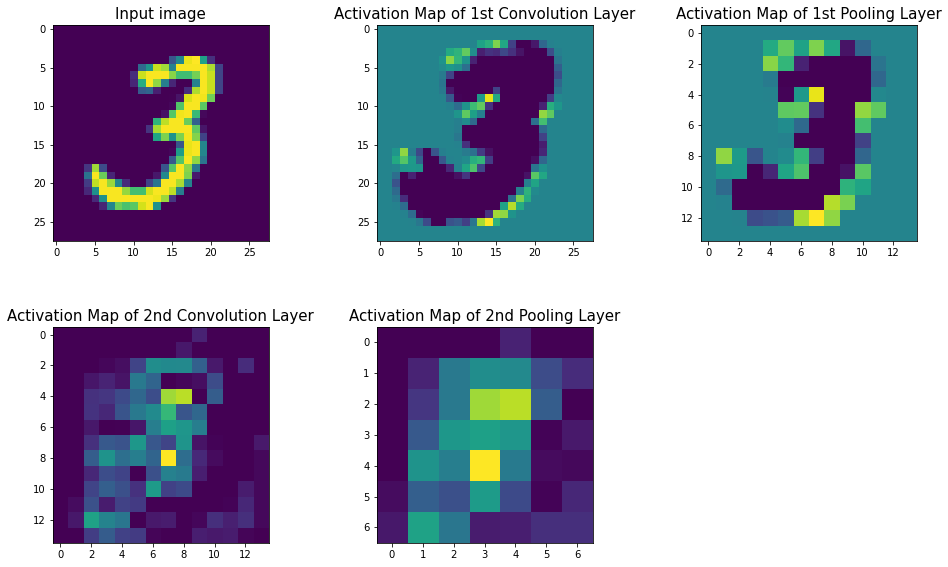


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.306 | Train Accuracy: 12.80% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.305  | Test Accuracy: 13.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 2 * * * * * * * * * * * * * * * * 


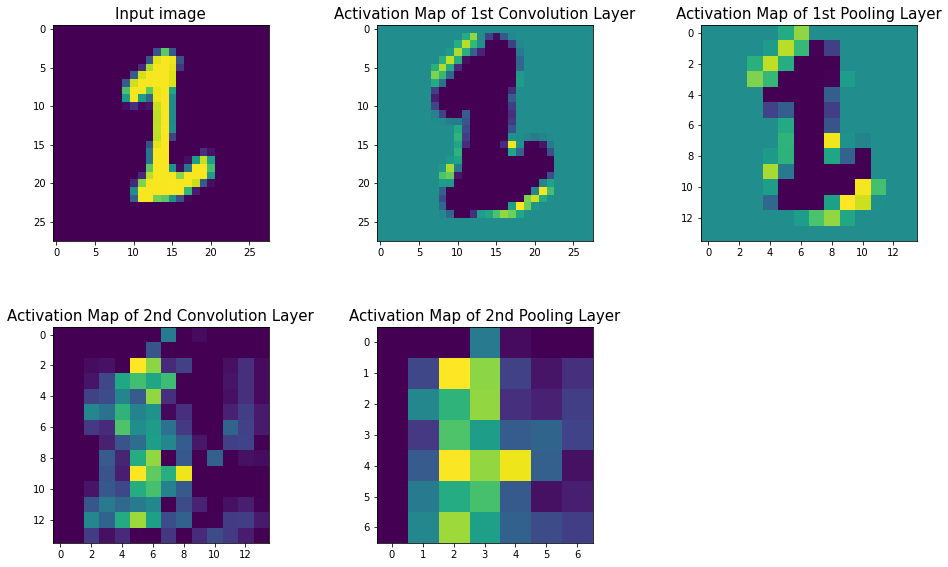


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.306 | Train Accuracy: 13.00% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.305  | Test Accuracy: 13.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 3 * * * * * * * * * * * * * * * * 


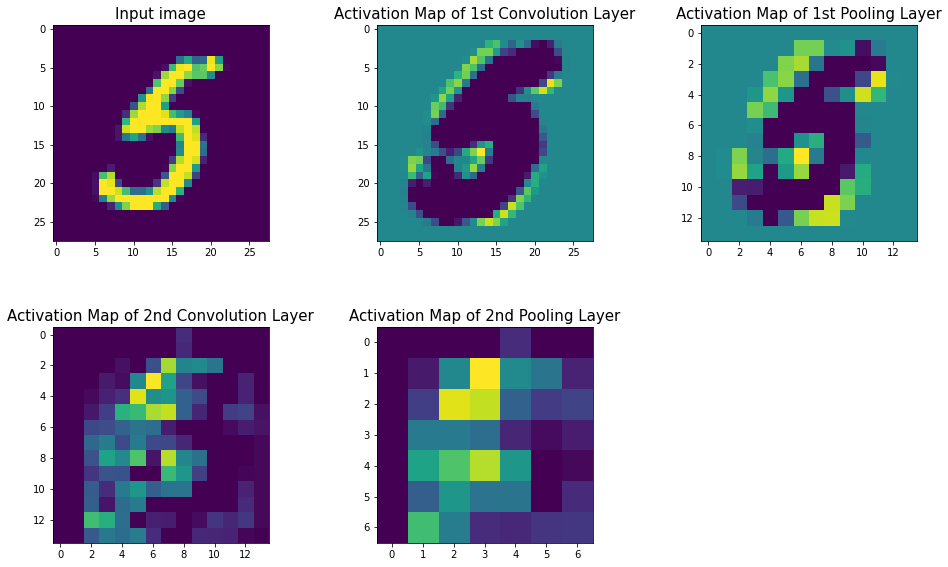


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.306 | Train Accuracy: 12.90% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.305  | Test Accuracy: 13.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 4 * * * * * * * * * * * * * * * * 


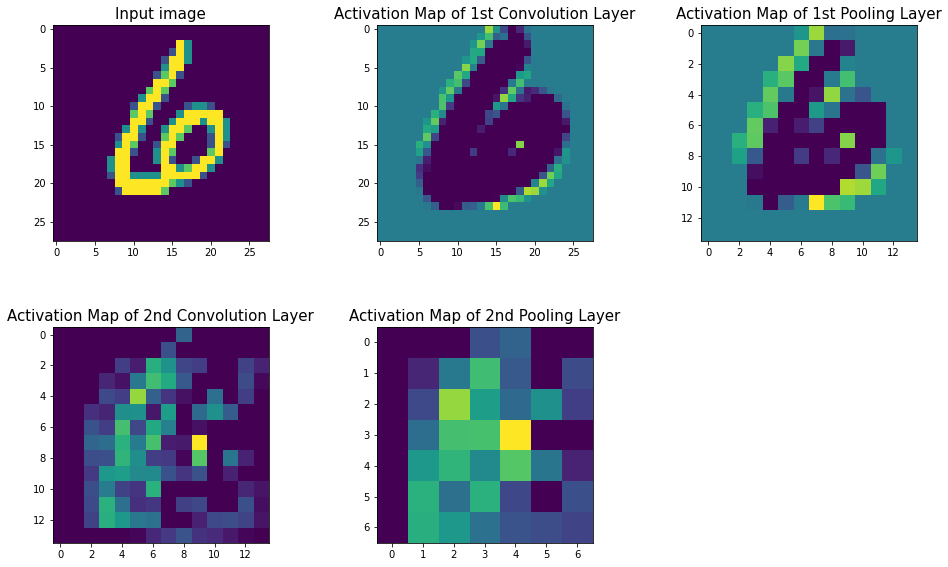


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.306 | Train Accuracy: 12.80% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.305  | Test Accuracy: 13.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 5 * * * * * * * * * * * * * * * * 


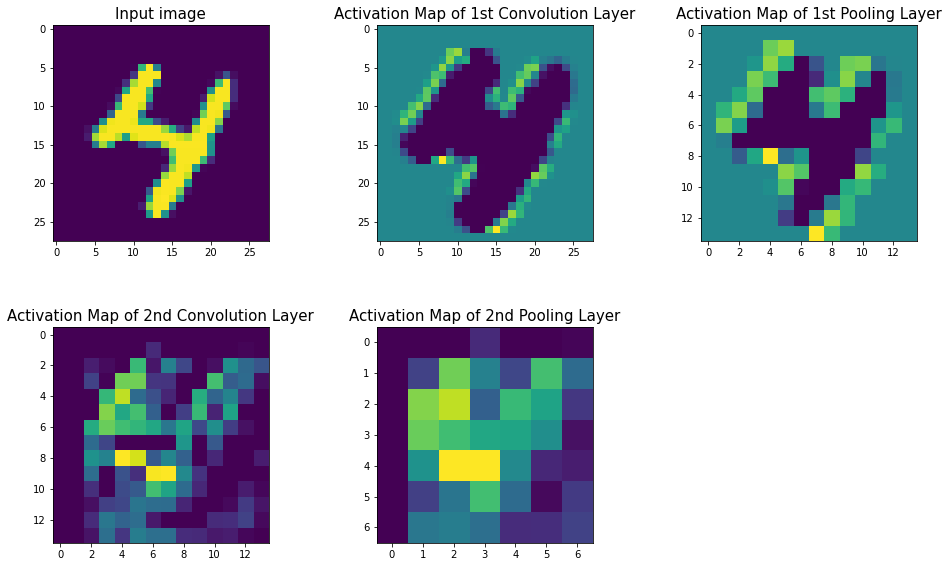


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.306 | Train Accuracy: 12.90% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.305  | Test Accuracy: 13.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 6 * * * * * * * * * * * * * * * * 


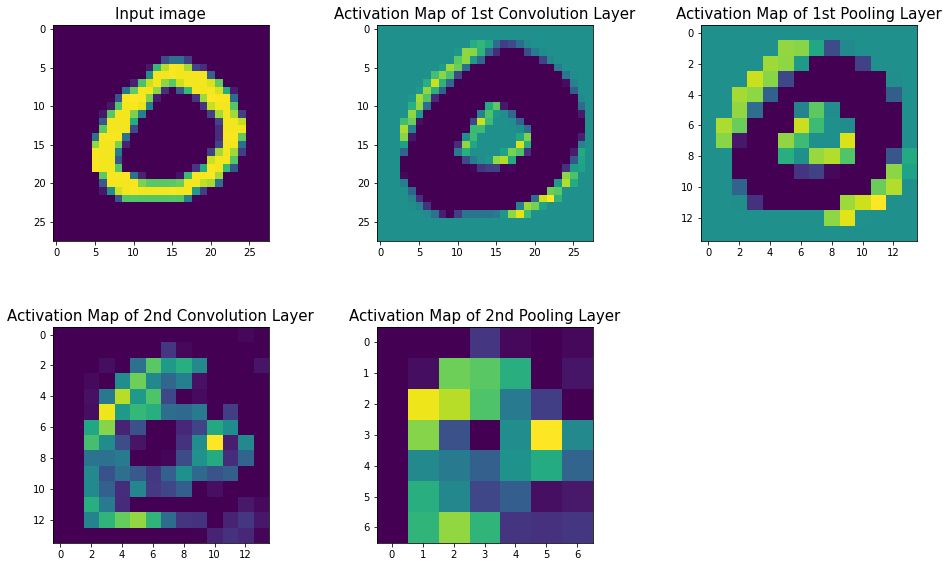


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.306 | Train Accuracy: 12.80% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.305  | Test Accuracy: 13.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 7 * * * * * * * * * * * * * * * * 


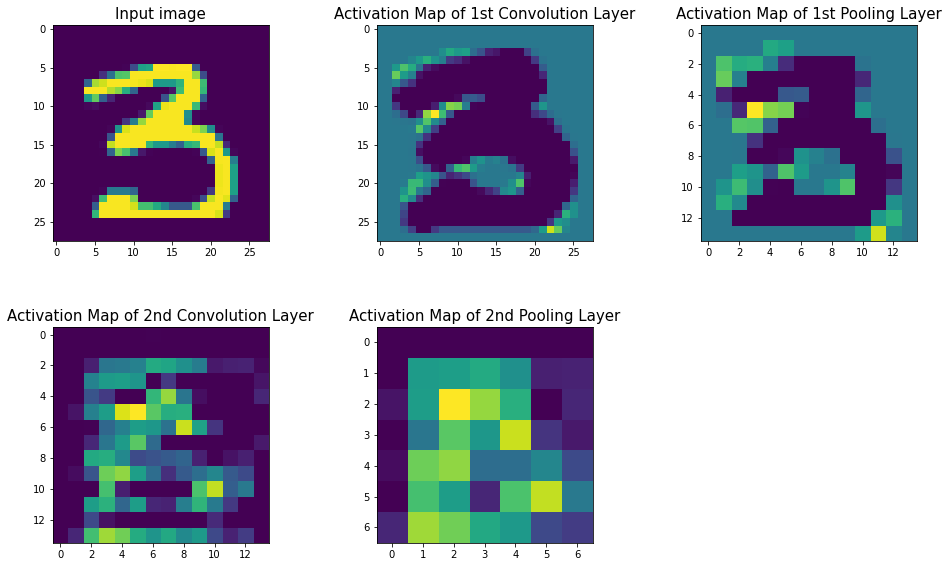


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.306 | Train Accuracy: 12.90% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.305  | Test Accuracy: 13.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 8 * * * * * * * * * * * * * * * * 


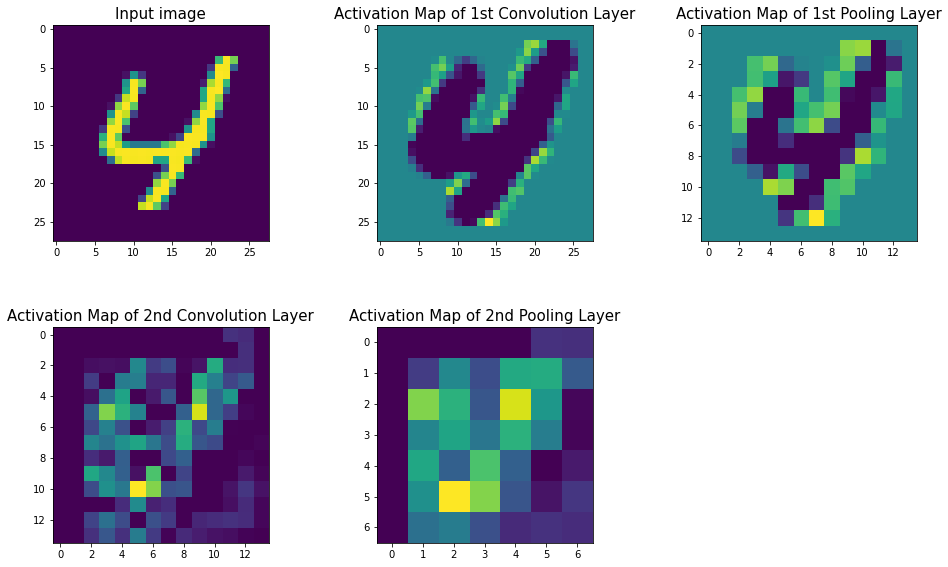


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.306 | Train Accuracy: 13.00% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.305  | Test Accuracy: 13.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 9 * * * * * * * * * * * * * * * * 


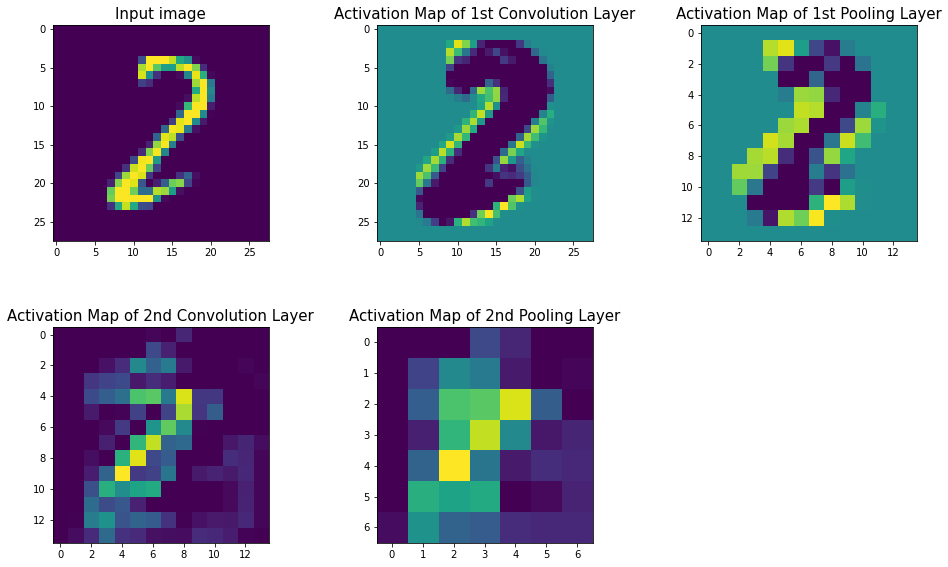


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.306 | Train Accuracy: 13.20% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.305  | Test Accuracy: 13.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 10 * * * * * * * * * * * * * * * * 


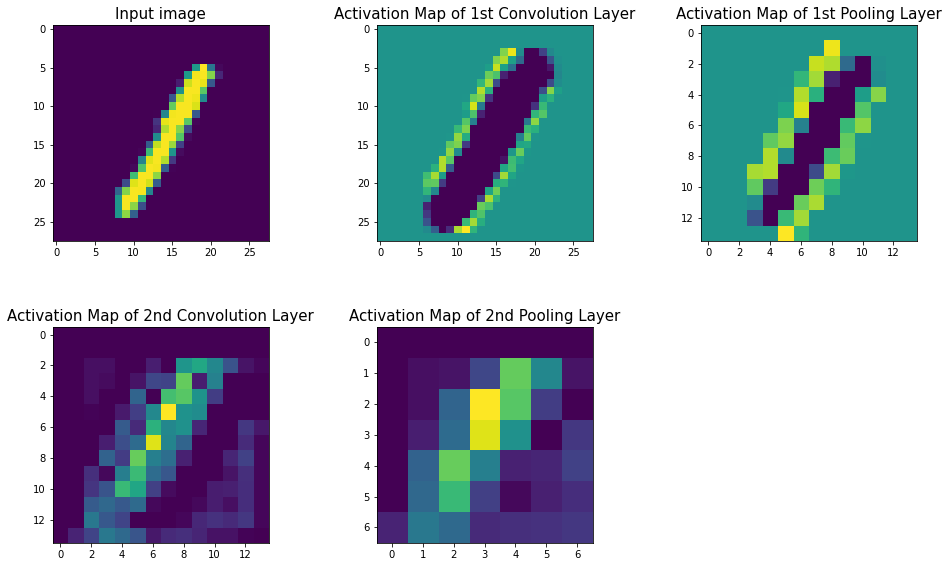


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.306 | Train Accuracy: 13.20% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.305  | Test Accuracy: 13.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 11 * * * * * * * * * * * * * * * * 


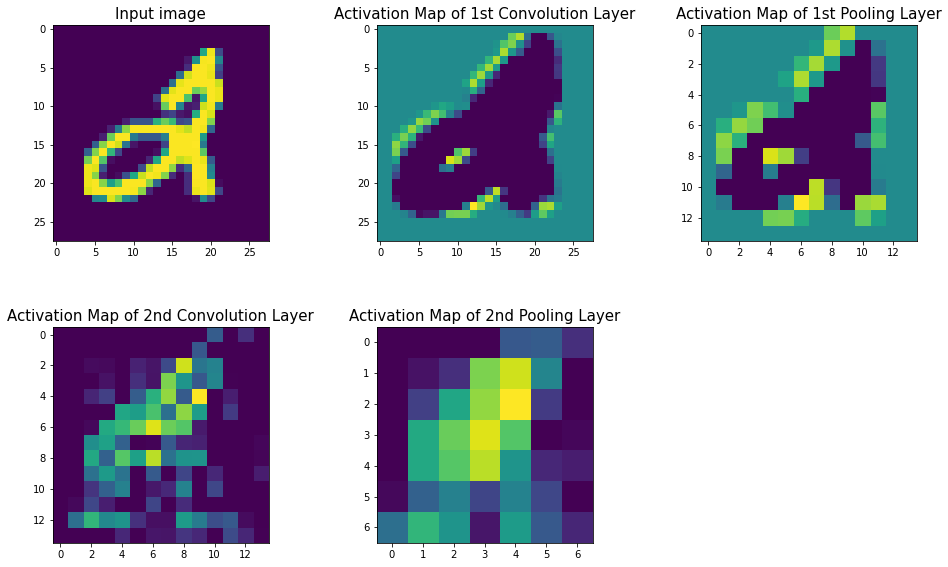


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.306 | Train Accuracy: 13.40% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.305  | Test Accuracy: 13.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 12 * * * * * * * * * * * * * * * * 


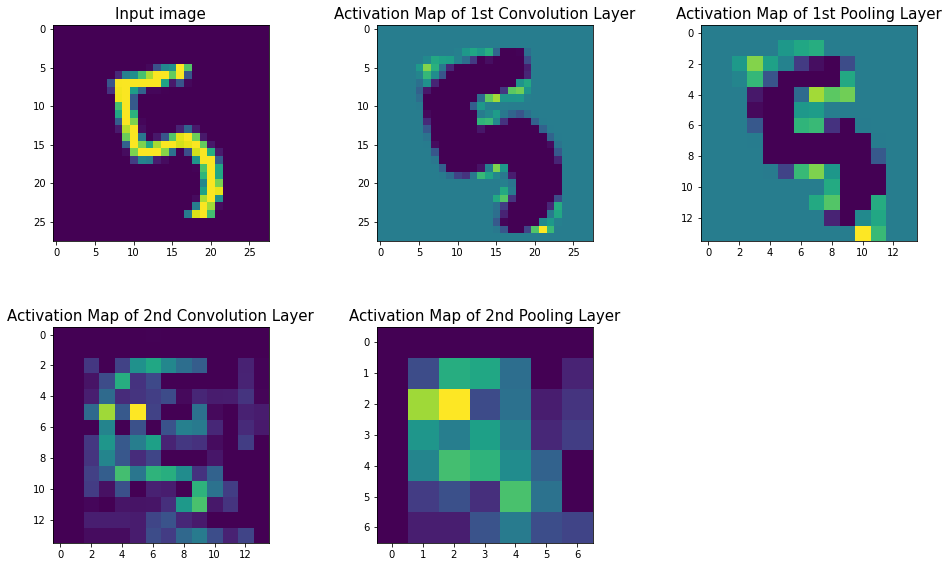


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.306 | Train Accuracy: 13.30% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.305  | Test Accuracy: 13.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 13 * * * * * * * * * * * * * * * * 


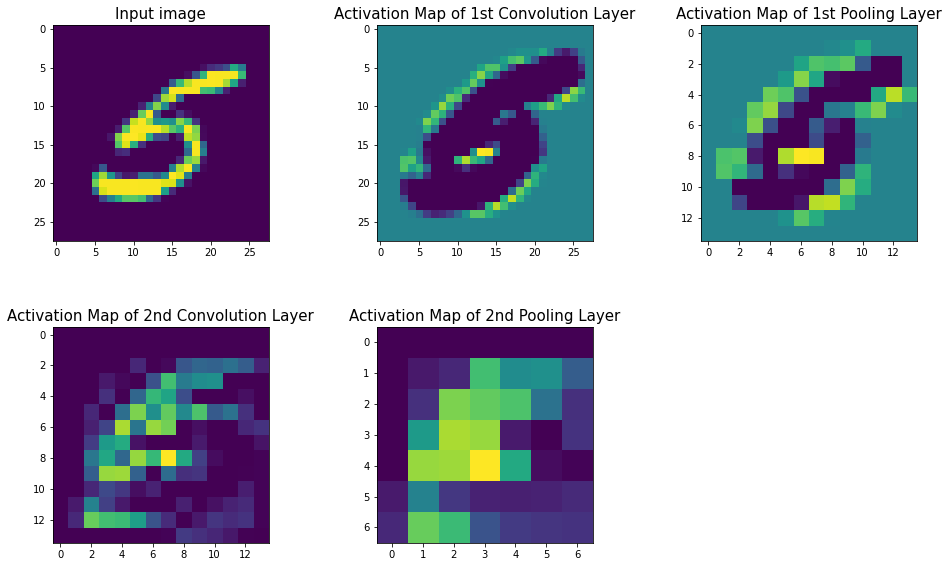


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.306 | Train Accuracy: 13.30% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.304  | Test Accuracy: 13.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 14 * * * * * * * * * * * * * * * * 


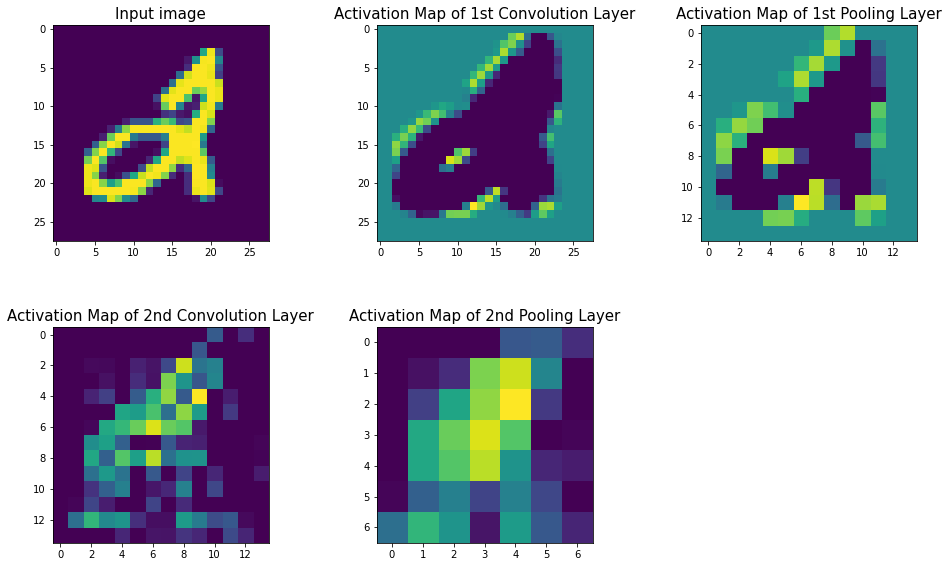


 - - - - - - - - - - - - - - - Epoch Time :  0m  1s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.305 | Train Accuracy: 13.30% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.304  | Test Accuracy: 13.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 15 * * * * * * * * * * * * * * * * 


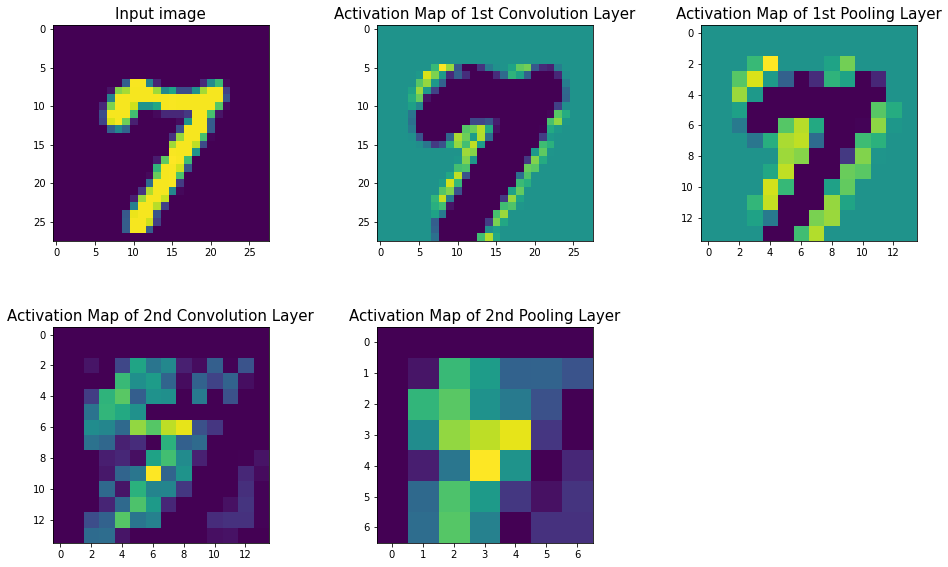


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.305 | Train Accuracy: 13.40% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.304  | Test Accuracy: 13.00% - - - - - - - - - -


In [16]:
result_1 = evaluate("SGD")

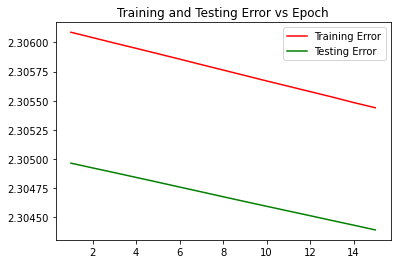

In [17]:
plt.plot(range(1,16), [x.detach().numpy() for x in result_1["train loss"]], color="red")
plt.plot(range(1,16), [x.detach().numpy() for x in result_1["test loss"]], color="green")
plt.title("Training and Testing Error vs Epoch")
plt.legend(["Training Error", "Testing Error"], loc="best")
plt.show()

In [18]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [19]:
colors = ['aqua', 'blue', 'gray', 'gold', 'green', 'fuchsia', 'maroon', 'purple', 'red', 'orange']

<ipython-input-20-5b0ad0bc5c6c>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-20-5b0ad0bc5c6c>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


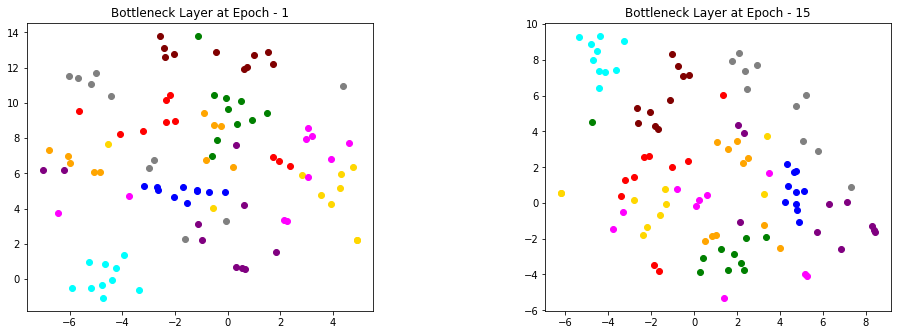

In [20]:
tsne = TSNE()

list_1 = [vect.numpy() for batch in result_1['bottleneck_1'] for vect in batch]
list_2 = [vect.numpy() for batch in result_1['bottleneck_15'] for vect in batch]

bottleneck_embedded1 = tsne.fit_transform(list_1)
bottleneck_embedded2 = tsne.fit_transform(list_2)

target = 0
for i in range(100):
    plt.subplot(1,2,1)
    plt.plot(bottleneck_embedded1[i][0], bottleneck_embedded1[i][1], 'o', color=colors[target])
    
    if (i + 1) % 10 == 0:
        target += 1
plt.title("Bottleneck Layer at Epoch - 1") 

target = 0
for i in range(100):
    plt.subplot(1,2,2)
    plt.plot(bottleneck_embedded2[i][0], bottleneck_embedded2[i][1], 'o', color=colors[target])
    
    if (i + 1) % 10 == 0:
        target += 1

plt.title("Bottleneck Layer at Epoch - 15")

plt.subplots_adjust(left=1, bottom=2, right=3, top=3, wspace=0.5, hspace=0.1)
plt.show()

### Momentum


 * * * * * * * * * * * * * * * * Epoch - 1 * * * * * * * * * * * * * * * * 


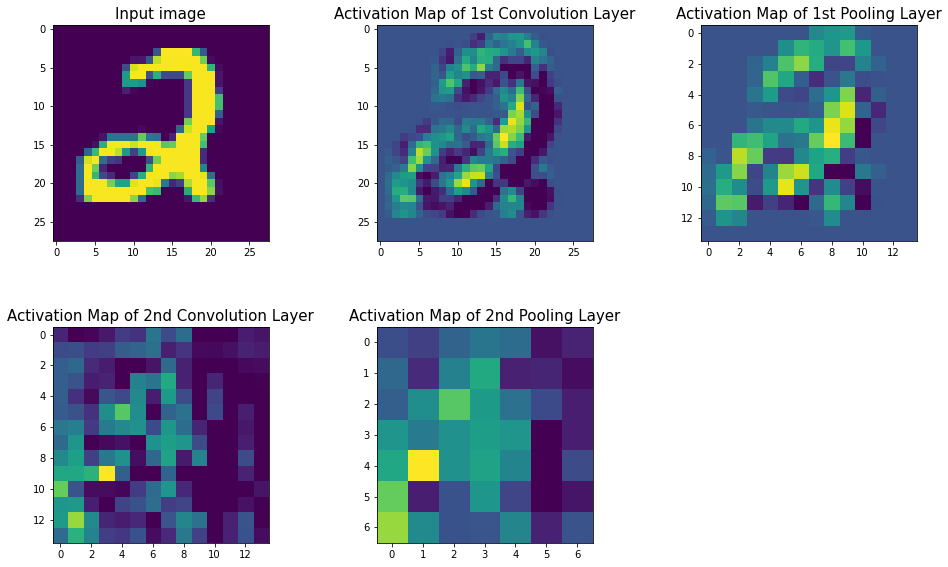


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.306 | Train Accuracy: 10.00% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.306  | Test Accuracy: 10.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 2 * * * * * * * * * * * * * * * * 


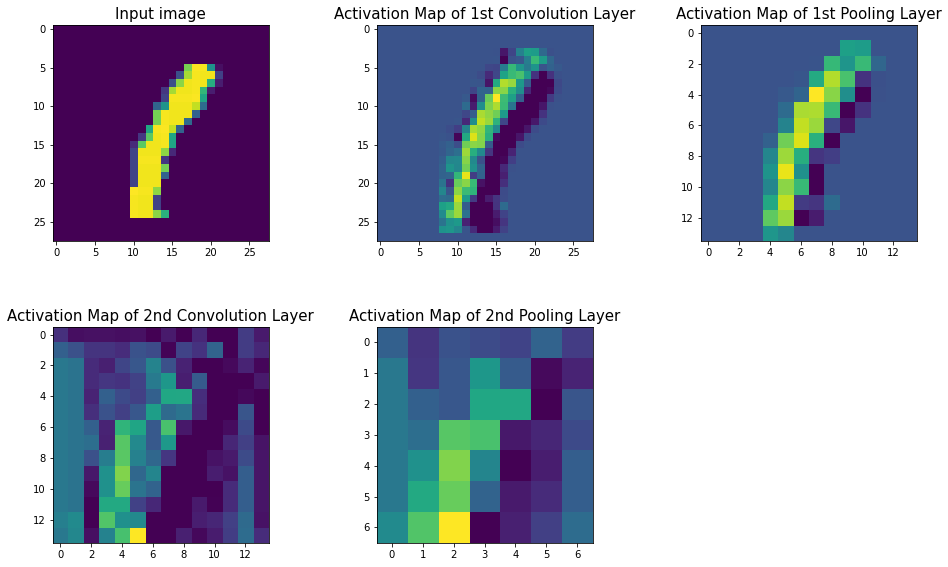


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.305 | Train Accuracy: 10.00% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.306  | Test Accuracy: 10.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 3 * * * * * * * * * * * * * * * * 


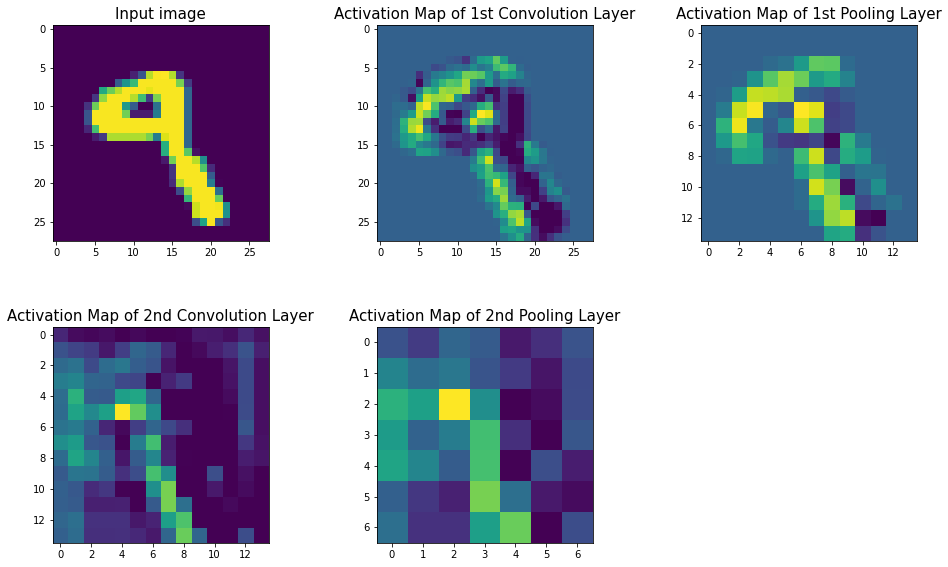


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.305 | Train Accuracy: 10.00% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.306  | Test Accuracy: 10.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 4 * * * * * * * * * * * * * * * * 


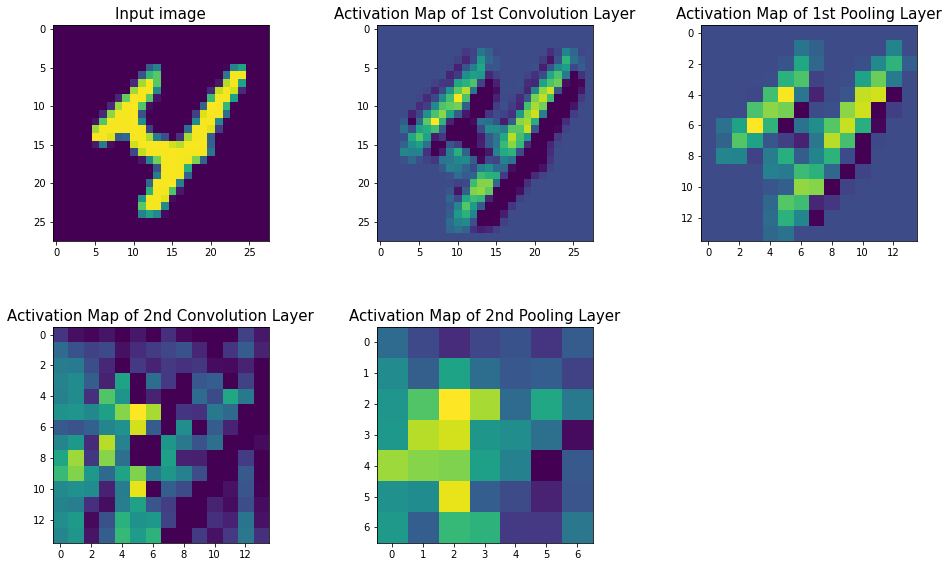


 - - - - - - - - - - - - - - - Epoch Time :  0m  1s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.304 | Train Accuracy: 10.00% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.305  | Test Accuracy: 10.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 5 * * * * * * * * * * * * * * * * 


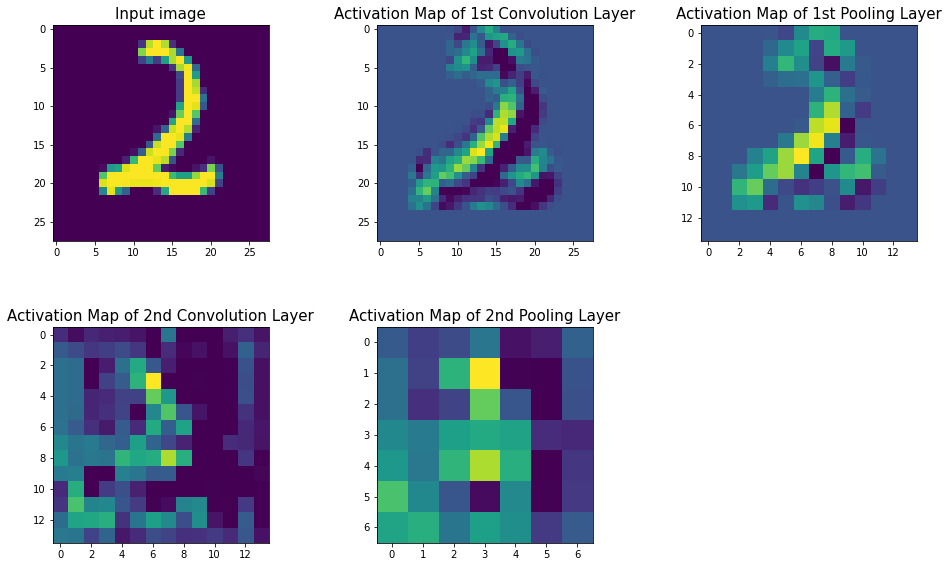


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.304 | Train Accuracy: 10.00% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.305  | Test Accuracy: 10.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 6 * * * * * * * * * * * * * * * * 


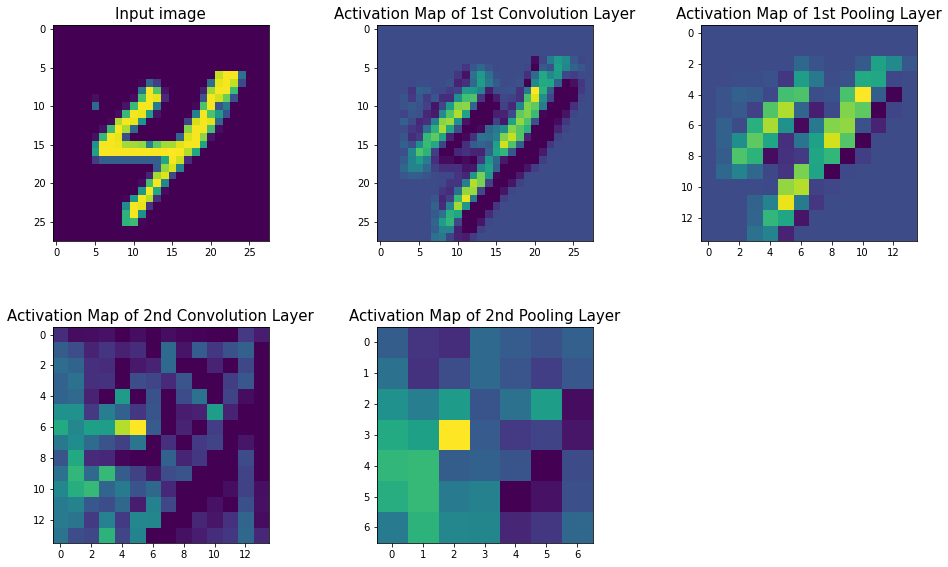


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.304 | Train Accuracy: 10.00% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.305  | Test Accuracy: 10.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 7 * * * * * * * * * * * * * * * * 


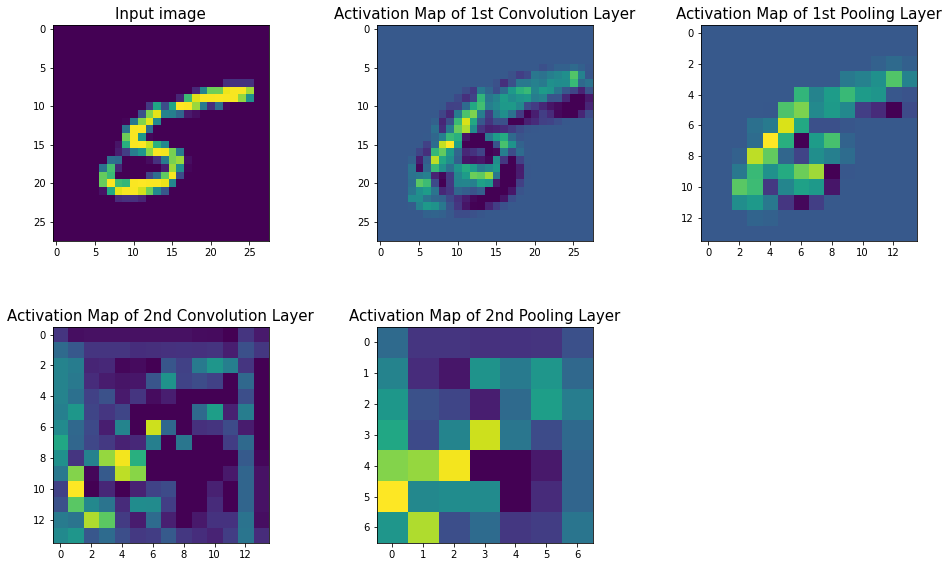


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.303 | Train Accuracy: 10.00% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.304  | Test Accuracy: 10.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 8 * * * * * * * * * * * * * * * * 


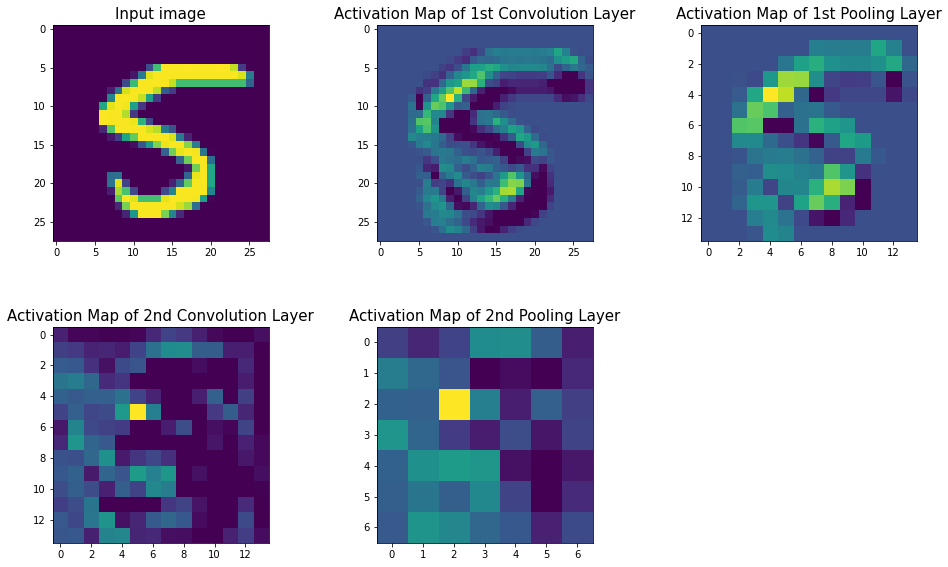


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.303 | Train Accuracy: 10.10% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.304  | Test Accuracy: 10.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 9 * * * * * * * * * * * * * * * * 


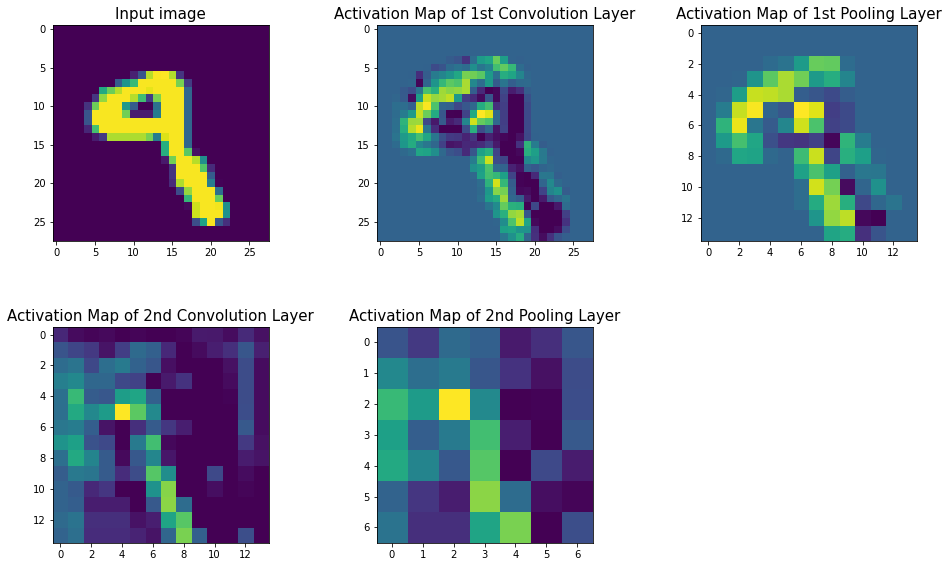


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.303 | Train Accuracy: 10.20% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.304  | Test Accuracy: 10.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 10 * * * * * * * * * * * * * * * * 


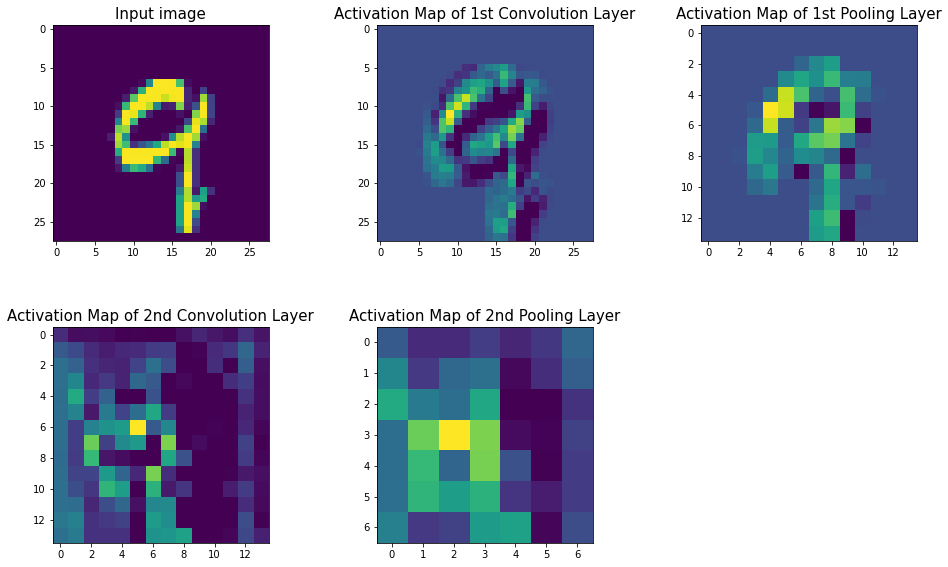


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.302 | Train Accuracy: 10.30% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.303  | Test Accuracy: 10.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 11 * * * * * * * * * * * * * * * * 


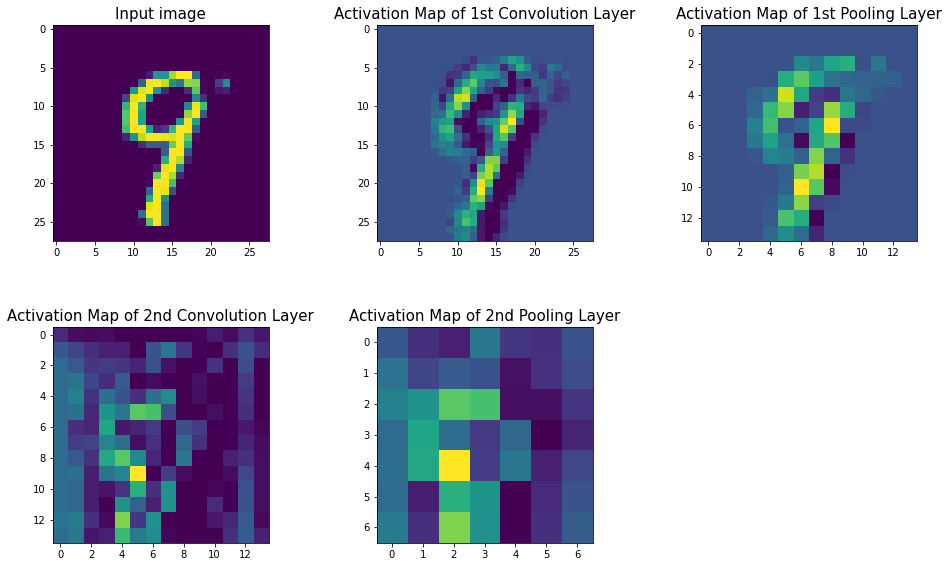


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.302 | Train Accuracy: 10.30% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.303  | Test Accuracy: 10.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 12 * * * * * * * * * * * * * * * * 


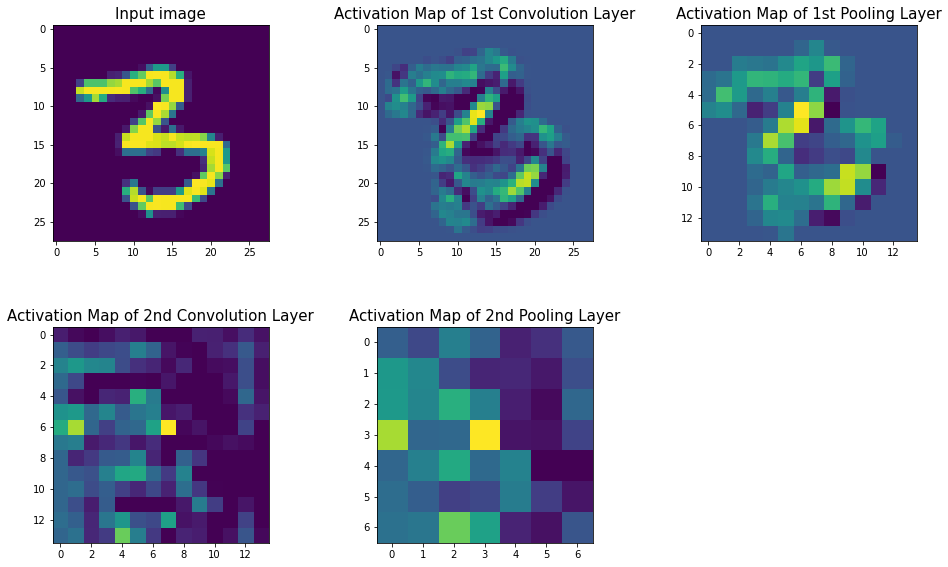


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.302 | Train Accuracy: 10.20% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.303  | Test Accuracy: 10.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 13 * * * * * * * * * * * * * * * * 


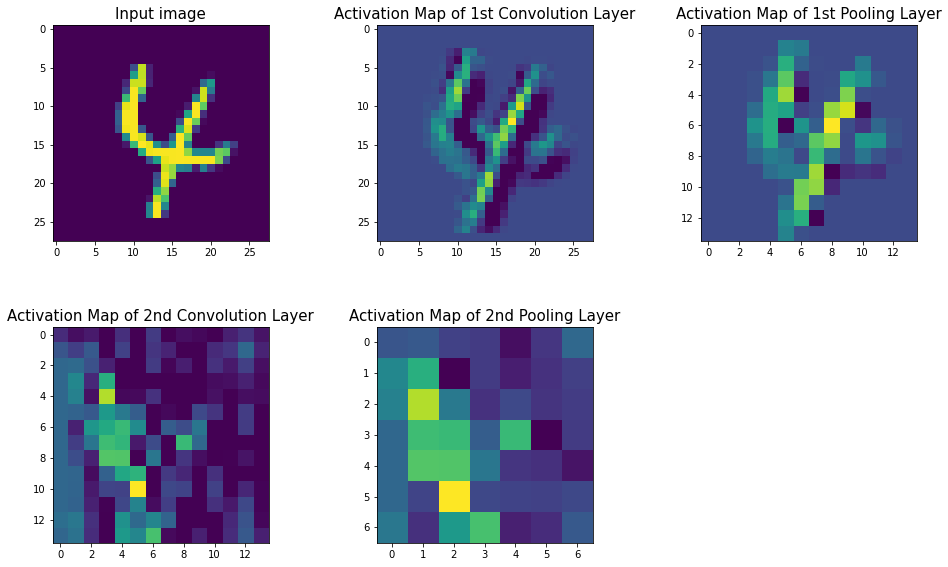


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.301 | Train Accuracy: 10.50% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.303  | Test Accuracy: 10.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 14 * * * * * * * * * * * * * * * * 


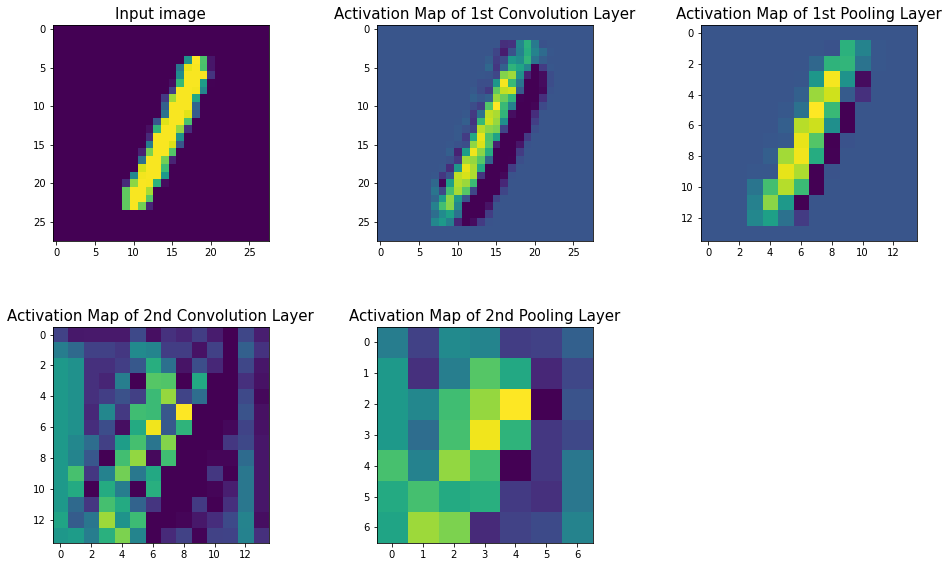


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.301 | Train Accuracy: 10.60% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.302  | Test Accuracy: 10.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 15 * * * * * * * * * * * * * * * * 


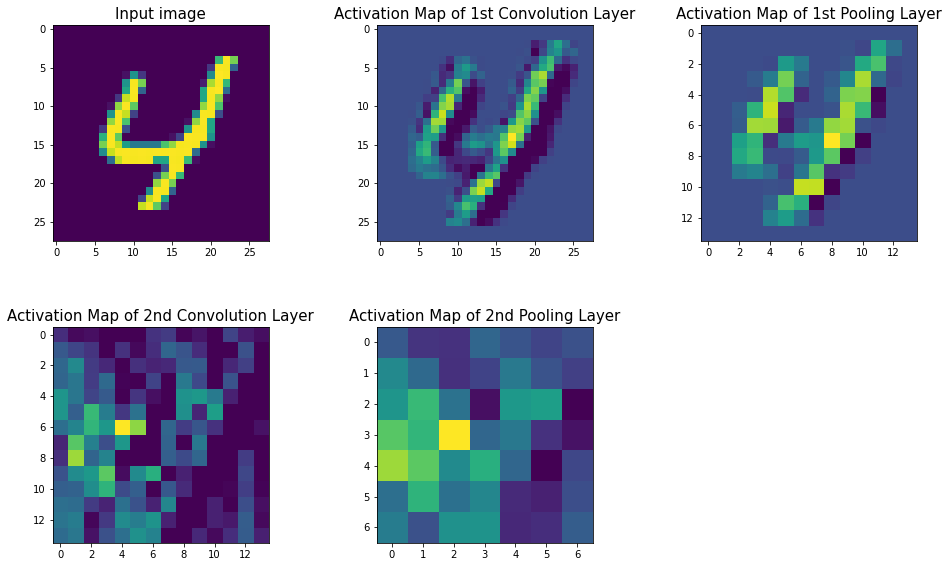


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.300 | Train Accuracy: 10.60% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.302  | Test Accuracy: 10.00% - - - - - - - - - -


In [23]:
result_2 = evaluate("Momentum")

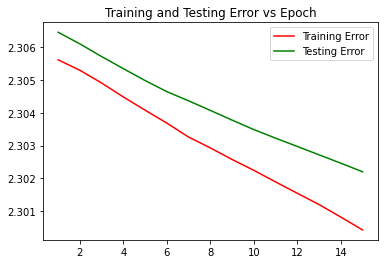

In [24]:
plt.plot(range(1,16), [x.detach().numpy() for x in result_2["train loss"]], color="red")
plt.plot(range(1,16), [x.detach().numpy() for x in result_2["test loss"]], color="green")
plt.title("Training and Testing Error vs Epoch")
plt.legend(["Training Error", "Testing Error"], loc="best")
plt.show()

<ipython-input-25-19a76abcb434>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-25-19a76abcb434>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


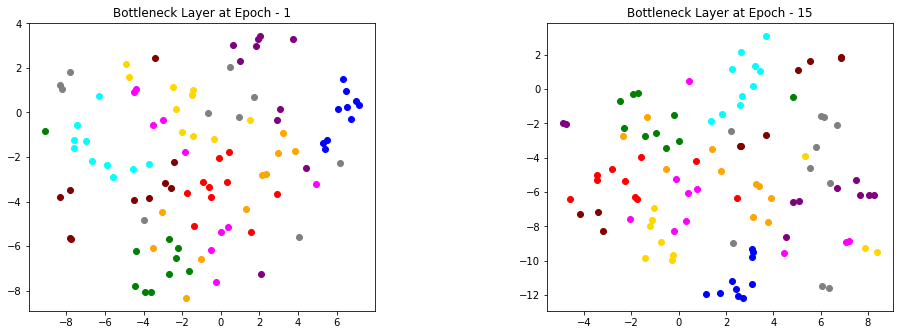

In [25]:
tsne = TSNE()

list_1 = [vect.numpy() for batch in result_2['bottleneck_1'] for vect in batch]
list_2 = [vect.numpy() for batch in result_2['bottleneck_15'] for vect in batch]

bottleneck_embedded1 = tsne.fit_transform(list_1)
bottleneck_embedded2 = tsne.fit_transform(list_2)

target = 0
for i in range(100):
    plt.subplot(1,2,1)
    plt.plot(bottleneck_embedded1[i][0], bottleneck_embedded1[i][1], 'o', color=colors[target])
    
    if (i + 1) % 10 == 0:
        target += 1
plt.title("Bottleneck Layer at Epoch - 1") 

target = 0
for i in range(100):
    plt.subplot(1,2,2)
    plt.plot(bottleneck_embedded2[i][0], bottleneck_embedded2[i][1], 'o', color=colors[target])
    
    if (i + 1) % 10 == 0:
        target += 1

plt.title("Bottleneck Layer at Epoch - 15")

plt.subplots_adjust(left=1, bottom=2, right=3, top=3, wspace=0.5, hspace=0.1)
plt.show()

### RMSProp


 * * * * * * * * * * * * * * * * Epoch - 1 * * * * * * * * * * * * * * * * 


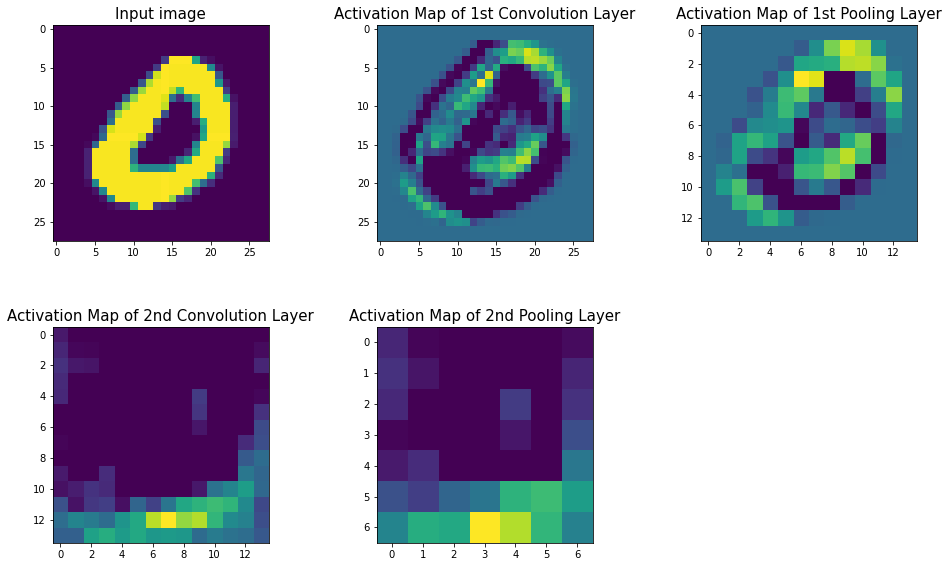


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.259 | Train Accuracy: 17.20% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.189  | Test Accuracy: 27.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 2 * * * * * * * * * * * * * * * * 


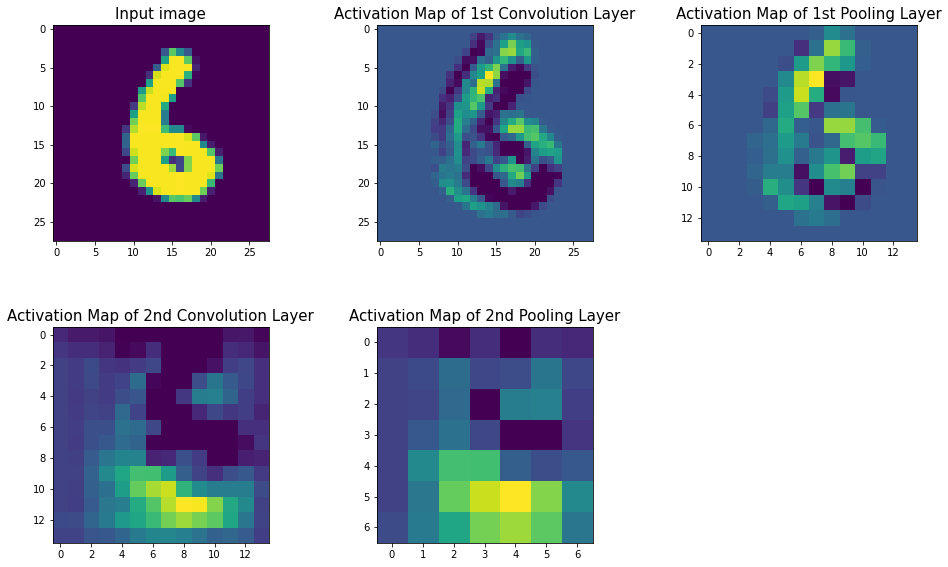


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.063 | Train Accuracy: 39.70% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 1.933  | Test Accuracy: 46.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 3 * * * * * * * * * * * * * * * * 


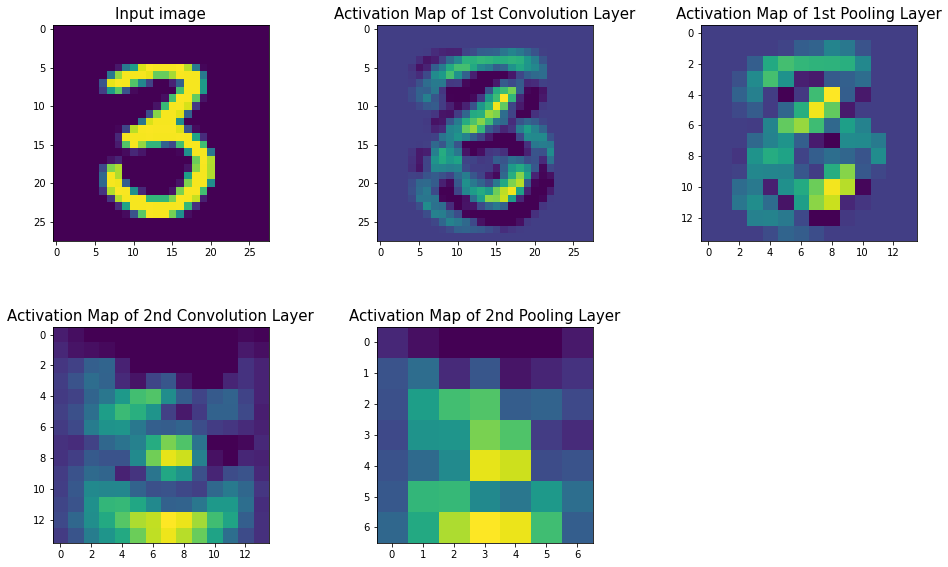


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 1.734 | Train Accuracy: 58.60% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 1.604  | Test Accuracy: 54.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 4 * * * * * * * * * * * * * * * * 


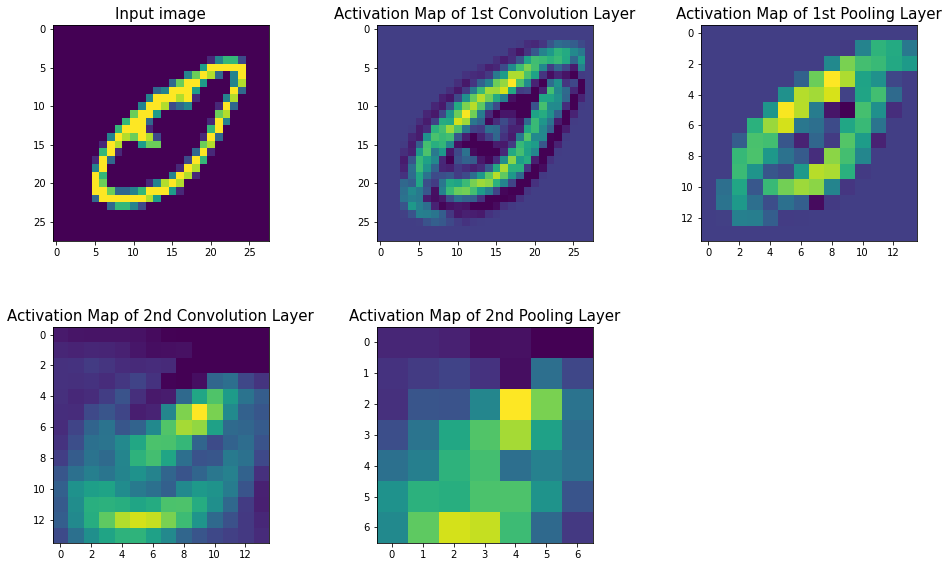


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 1.372 | Train Accuracy: 69.00% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 1.271  | Test Accuracy: 67.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 5 * * * * * * * * * * * * * * * * 


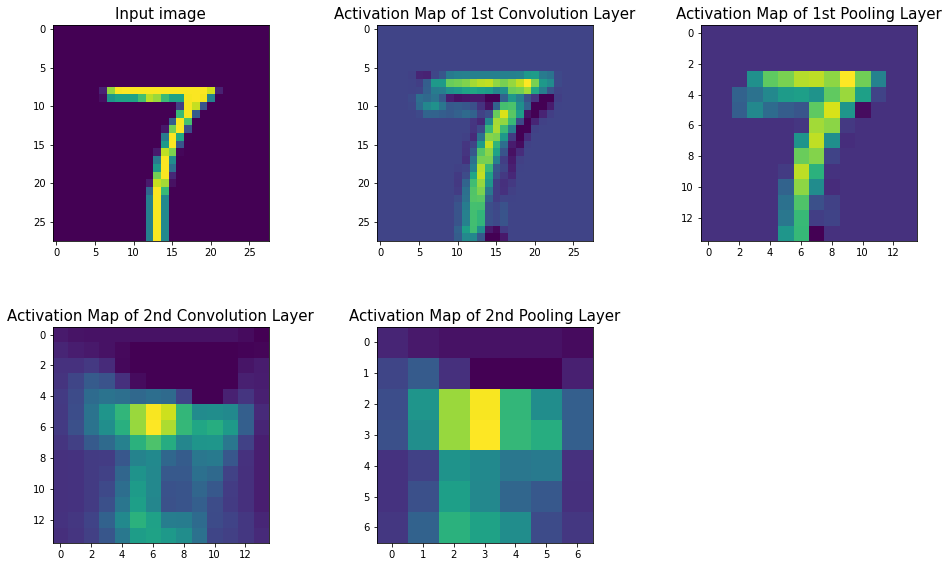


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 1.077 | Train Accuracy: 76.60% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 1.089  | Test Accuracy: 67.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 6 * * * * * * * * * * * * * * * * 


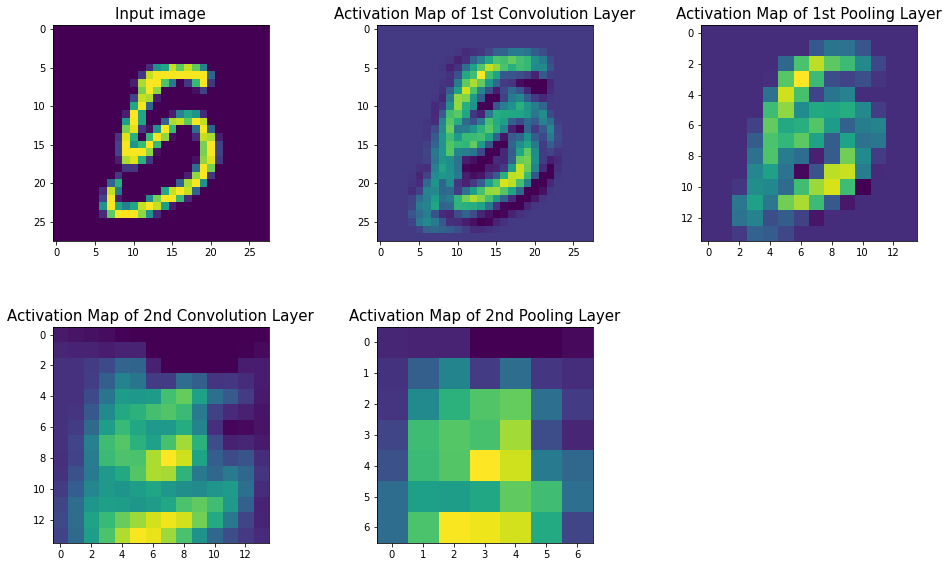


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 0.885 | Train Accuracy: 76.90% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 0.872  | Test Accuracy: 75.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 7 * * * * * * * * * * * * * * * * 


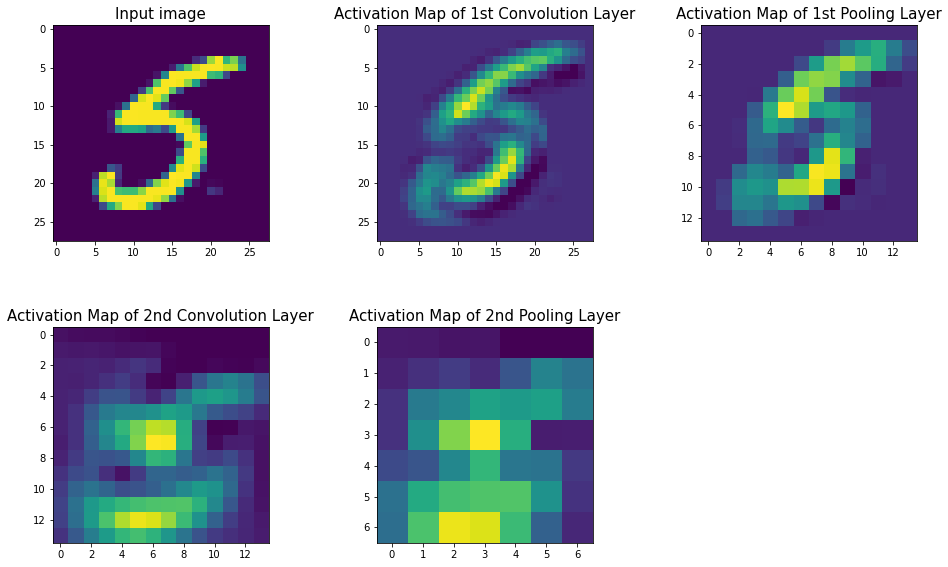


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 0.745 | Train Accuracy: 80.70% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 0.743  | Test Accuracy: 82.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 8 * * * * * * * * * * * * * * * * 


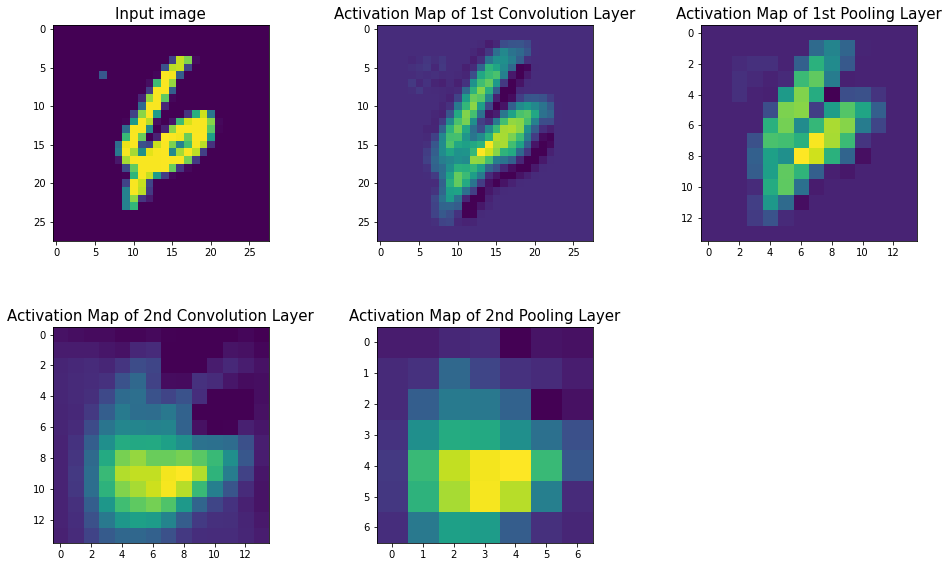


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 0.669 | Train Accuracy: 80.60% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 0.680  | Test Accuracy: 80.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 9 * * * * * * * * * * * * * * * * 


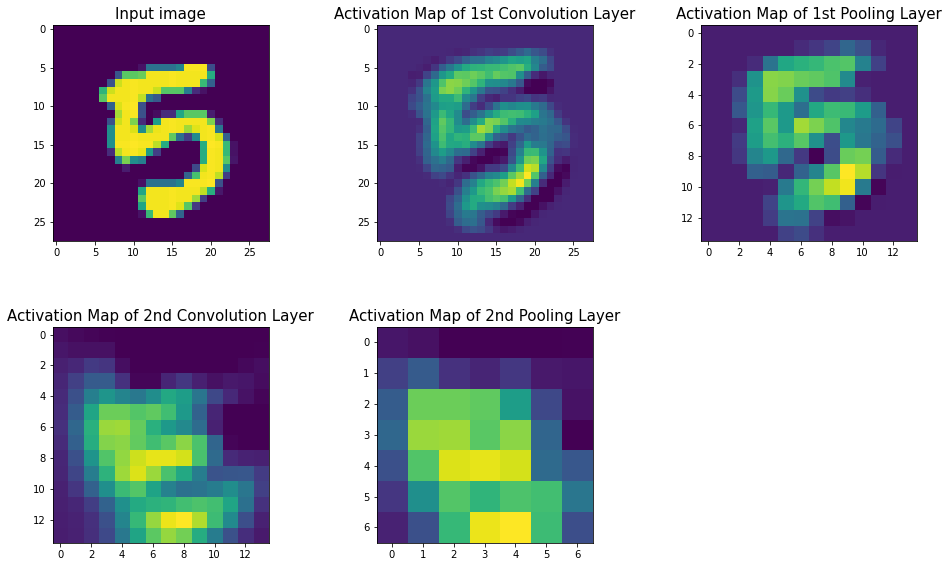


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 0.584 | Train Accuracy: 83.70% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 0.606  | Test Accuracy: 83.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 10 * * * * * * * * * * * * * * * * 


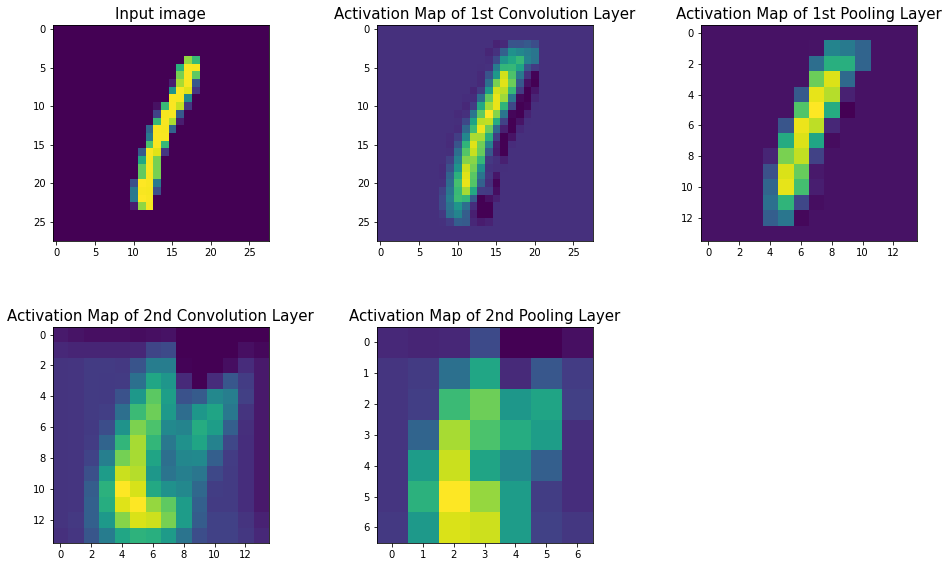


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 0.554 | Train Accuracy: 83.50% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 0.550  | Test Accuracy: 83.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 11 * * * * * * * * * * * * * * * * 


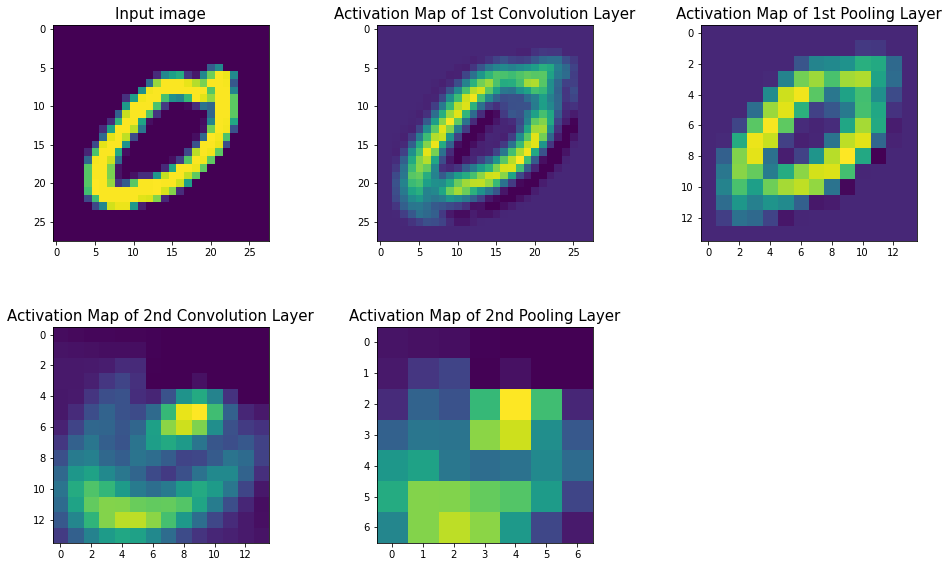


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 0.529 | Train Accuracy: 84.50% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 0.505  | Test Accuracy: 88.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 12 * * * * * * * * * * * * * * * * 


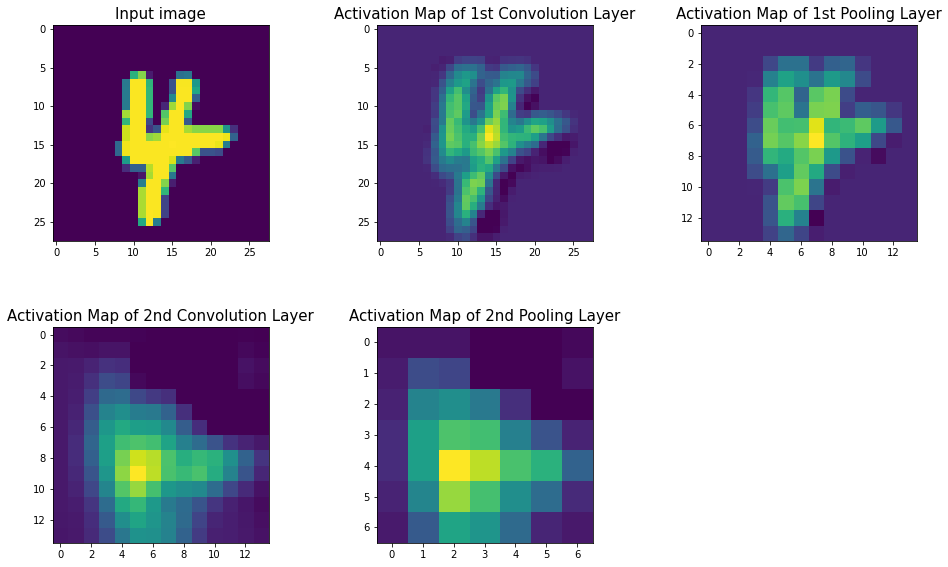


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 0.465 | Train Accuracy: 86.70% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 0.461  | Test Accuracy: 86.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 13 * * * * * * * * * * * * * * * * 


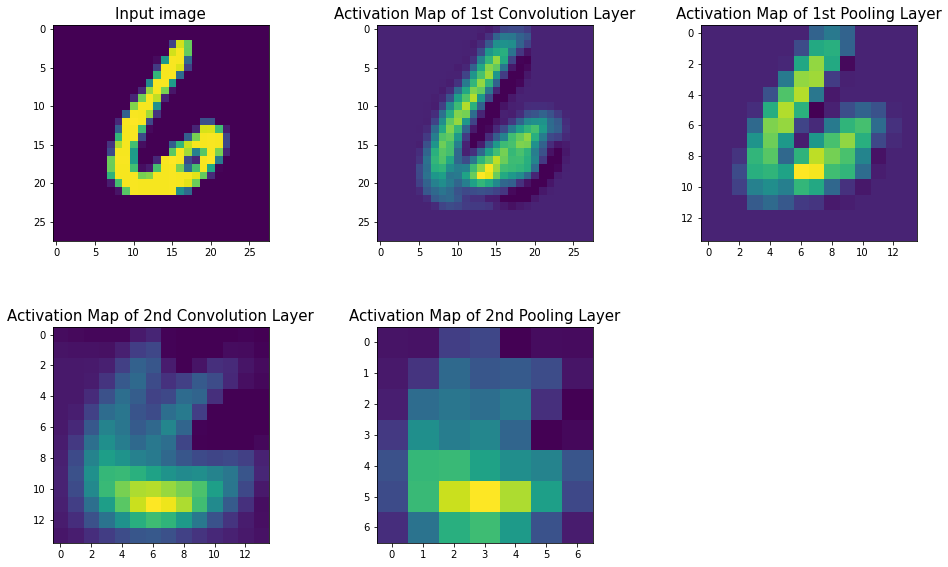


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 0.476 | Train Accuracy: 85.20% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 0.445  | Test Accuracy: 87.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 14 * * * * * * * * * * * * * * * * 


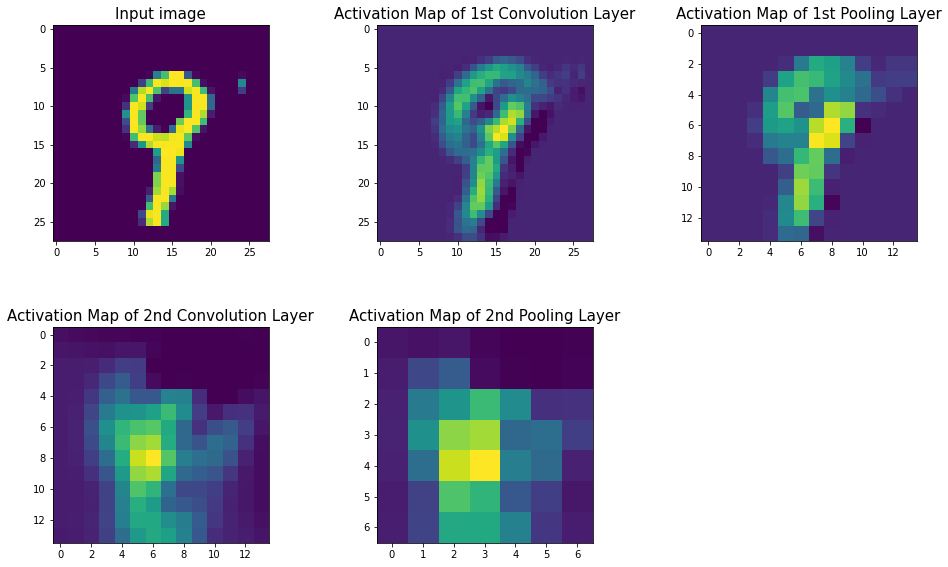


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 0.422 | Train Accuracy: 88.00% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 0.476  | Test Accuracy: 84.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 15 * * * * * * * * * * * * * * * * 


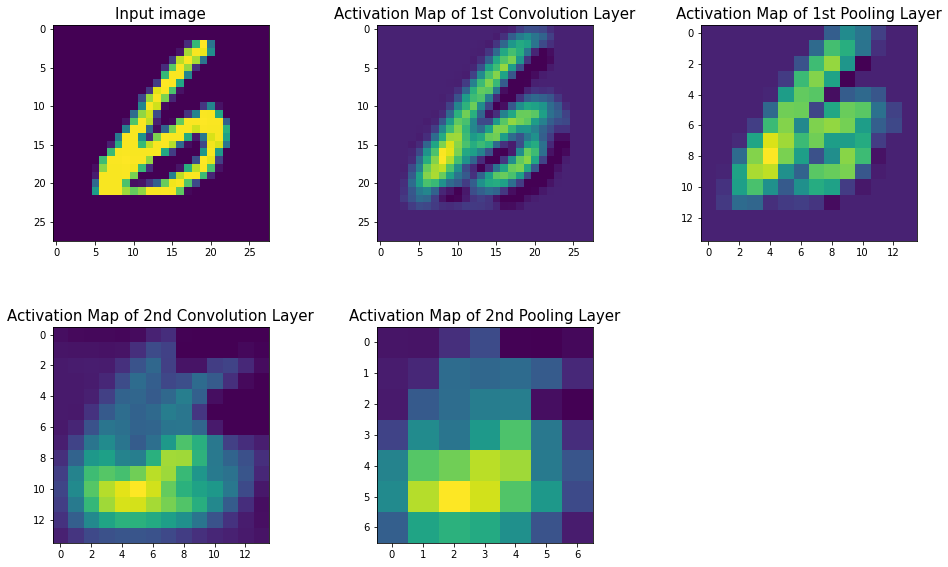


 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 0.425 | Train Accuracy: 86.60% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 0.371  | Test Accuracy: 90.00% - - - - - - - - - -


In [26]:
result_3 = evaluate("RMSProp")

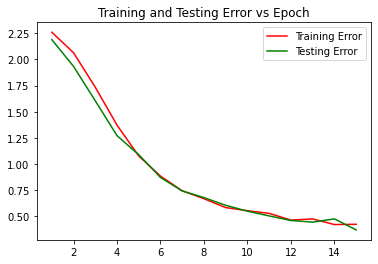

In [27]:
plt.plot(range(1,16), [x.detach().numpy() for x in result_3["train loss"]], color="red")
plt.plot(range(1,16), [x.detach().numpy() for x in result_3["test loss"]], color="green")
plt.title("Training and Testing Error vs Epoch")
plt.legend(["Training Error", "Testing Error"], loc="best")
plt.show()

<ipython-input-28-3cc5ed59d2bd>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-28-3cc5ed59d2bd>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


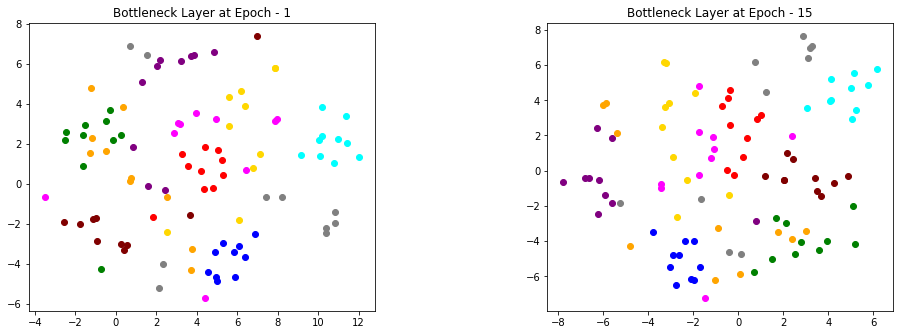

In [28]:
tsne = TSNE()

list_1 = [vect.numpy() for batch in result_3['bottleneck_1'] for vect in batch]
list_2 = [vect.numpy() for batch in result_3['bottleneck_15'] for vect in batch]

bottleneck_embedded1 = tsne.fit_transform(list_1)
bottleneck_embedded2 = tsne.fit_transform(list_2)

target = 0
for i in range(100):
    plt.subplot(1,2,1)
    plt.plot(bottleneck_embedded1[i][0], bottleneck_embedded1[i][1], 'o', color=colors[target])
    
    if (i + 1) % 10 == 0:
        target += 1
plt.title("Bottleneck Layer at Epoch - 1") 

target = 0
for i in range(100):
    plt.subplot(1,2,2)
    plt.plot(bottleneck_embedded2[i][0], bottleneck_embedded2[i][1], 'o', color=colors[target])
    
    if (i + 1) % 10 == 0:
        target += 1

plt.title("Bottleneck Layer at Epoch - 15")

plt.subplots_adjust(left=1, bottom=2, right=3, top=3, wspace=0.5, hspace=0.1)
plt.show()

# Q. 5

### Ans. 

At the end of 15th Epoch:

In assignment 4, For Vanilla SGD, Momentum and RMSProp, my accuracy was constant, i.e. 10.00%. The results were not proper as we want. 

While in this assignment, The results are:

1. For Vanilla SGD :

=> Training Error = 2.305 | Testing Error = 2.304 | Training Accuracy = 13.40% | Testing Accuracy = 13.00%

2. For Momentum :

=> Training Error = 2.300 | Testing Error = 2.302 | Training Accuracy = 10.60% | Testing Accuracy = 10.00%

3. For RMSProp :

=> Training Error = 0.425 | Testing Error = 0.371 | Training Accuracy = 86.60% | Testing Accuracy = 90.00%

In PyTorch things are more imperative and dynamic: one can define, change and execute nodes as we go, no special session interfaces or placeholders. Hence we get proper results of each component. 


# Q. 6

In [29]:
class CNN_Dropout(nn.Module):
    def __init__(self, p):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=5, stride=1, padding=2)                              
        self.relu1 = nn.ReLU()                    
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2,2),stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=4, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()            
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2,2),stride=2)
 
        self.fc1 = nn.Linear(in_features=196, out_features=49)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=49, out_features=10)
        self.softmax = nn.Softmax(dim=1)
        self.p = p
        self.dropout = nn.Dropout(p = self.p)
        
        self.bottleneck_layer = 0
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)       
        x = torch.flatten(x, 1)
        self.bottleneck_layer = x
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [30]:
def train_new(model, trainloader, loss_function, optimizer):
    
    model.train()
    
    train_loss = 0
    train_acc = 0
    
    total_train_loss = 0 
    
    for (x, y) in trainloader:
        pred = model(x)
        
        loss = loss_function(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_train_loss += loss
        train_acc += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    return total_train_loss/10, train_acc/1000

In [31]:
def evaluate_Dropout(p="0.2"):
    
    model = CNN_Dropout(p)
    opt = torch.optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)
    epochs = 15
    loss_func = nn.CrossEntropyLoss()  
    
    results = { 'train loss' : [],
                'test loss' : [],
                'train accuracy' : [],
                'test accuracy' : [],
                'bottleneck_1' : [],
                'bottleneck_15' : []}

    for epoch in range(epochs):
        
        print("\n * * * * * * * * * * * * * * * * Epoch -", epoch+1 ,"* * * * * * * * * * * * * * * * ")
        start_time = time.monotonic()
        train_loss, train_acc = train_new(model, trainDataLoader, loss_func, opt)
        test_loss, test_acc = test(model, testDataLoader, loss_func, opt, epoch, results)
        end_time = time.monotonic()
        epoch_mins, epoch_secs = epochs_time(start_time, end_time)
        print(f'\n - - - - - - - - - - - - - - - Epoch Time :  {epoch_mins}m  {epoch_secs}s  - - - - - - - - - - - - - - - ')


        results['train loss'].append(train_loss)
        results['test loss'].append(test_loss)
        results['train accuracy'].append(train_acc)
        results['test accuracy'].append(test_acc)

        #print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f' - - - - - - - - - - Train Loss: {train_loss:.3f} | Train Accuracy: {train_acc*100:.2f}% - - - - - - - - - -')
        print(f' - - - - - - - - - - Test Loss: {test_loss:.3f}  | Test Accuracy: {test_acc*100:.2f}% - - - - - - - - - -')
        
    return results

### Dropout rate = 0.2

In [32]:
result_4 = evaluate_Dropout(0.2)


 * * * * * * * * * * * * * * * * Epoch - 1 * * * * * * * * * * * * * * * * 

 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.275 | Train Accuracy: 16.30% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.194  | Test Accuracy: 42.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 2 * * * * * * * * * * * * * * * * 

 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.061 | Train Accuracy: 38.00% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 1.888  | Test Accuracy: 48.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 3 * * * * * * * * * * * * * * * * 

 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 1.701 | Train Accuracy: 52.70% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 1.502  | Test Accuracy: 61.00% - - - - - - - - - -

 * * * * * *

### Dropout rate = 0.5

In [33]:
result_5 = evaluate_Dropout(0.5)


 * * * * * * * * * * * * * * * * Epoch - 1 * * * * * * * * * * * * * * * * 

 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.281 | Train Accuracy: 11.90% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.229  | Test Accuracy: 27.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 2 * * * * * * * * * * * * * * * * 

 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.156 | Train Accuracy: 26.30% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.039  | Test Accuracy: 47.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 3 * * * * * * * * * * * * * * * * 

 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 1.950 | Train Accuracy: 37.00% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 1.794  | Test Accuracy: 55.00% - - - - - - - - - -

 * * * * * *

### Dropout rate = 0.8

In [34]:
result_6 = evaluate_Dropout(0.8)


 * * * * * * * * * * * * * * * * Epoch - 1 * * * * * * * * * * * * * * * * 

 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.304 | Train Accuracy: 11.60% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.294  | Test Accuracy: 12.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 2 * * * * * * * * * * * * * * * * 

 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.291 | Train Accuracy: 12.60% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.277  | Test Accuracy: 21.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 3 * * * * * * * * * * * * * * * * 

 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 2.257 | Train Accuracy: 16.50% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.244  | Test Accuracy: 31.00% - - - - - - - - - -

 * * * * * *

### Ans. The results are mentioned in below :

At the end of 15th Epoch:

=> Training Error without Dropout <  Training Error at dropout rate = 0.2 < Training Error at dropout rate = 0.5 < Training    Error at dropout rate = 0.8

=> Testing Error at dropout rate = 0.2 < Testing Error without Dropout < Testing Error at dropout rate = 0.5 < Testing Error at dropout rate = 0.8

=> Training Accuracy without Dropout >  Training Accuracy at dropout rate = 0.2 > Training Accuracy at dropout rate = 0.5 > Training Accuracy at dropout rate = 0.8

=> Testing Accuracy at dropout rate = 0.2 > Testing Accuracy without Dropout > Testing Accuracy at dropout rate = 0.5 > Testing Accuracy at dropout rate = 0.8

The conclusion is when one increase dropout beyond a certain threshold, it results in the model not being able to fit properly.

# Q.7

In [43]:
class CNN_DropoutWithBN(nn.Module):
    def __init__(self, p):
        super(CNN_DropoutWithBN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=5, stride=1, padding=2)                              
        self.relu1 = nn.ReLU()                    
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2,2),stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=4, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()            
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2,2),stride=2)
 
        self.fc1 = nn.Linear(in_features=196, out_features=49)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=49, out_features=10)
        self.softmax = nn.Softmax(dim=1)
        self.p = p
        self.dropout = nn.Dropout(p = self.p)
        self.batch_norm = nn.BatchNorm1d(49)
        self.bottleneck_layer = 0
        
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = torch.flatten(x, 1)
        self.bottleneck_layer = x
        x = self.fc1(x)
        x = self.batch_norm(x)
        x = self.relu3(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [46]:
def evaluate_DropoutWithBN(p="0.2"):
    
    model = CNN_DropoutWithBN(p)
    opt = torch.optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)
    epochs = 15
    loss_func = nn.CrossEntropyLoss()  
    
    results = { 'train loss' : [],
                'test loss' : [],
                'train accuracy' : [],
                'test accuracy' : [],
                'bottleneck_1' : [],
                'bottleneck_15' : []}

    for epoch in range(epochs):

        print("\n * * * * * * * * * * * * * * * * Epoch -", epoch+1 ,"* * * * * * * * * * * * * * * * ")
        start_time = time.monotonic()
        train_loss, train_acc = train_new(model, trainDataLoader, loss_func, opt)
        test_loss, test_acc = test(model, testDataLoader, loss_func, opt, epoch, results)
        end_time = time.monotonic()
        epoch_mins, epoch_secs = epochs_time(start_time, end_time)
        print(f'\n - - - - - - - - - - - - - - - Epoch Time :  {epoch_mins}m  {epoch_secs}s  - - - - - - - - - - - - - - - ')


        results['train loss'].append(train_loss)
        results['test loss'].append(test_loss)
        results['train accuracy'].append(train_acc)
        results['test accuracy'].append(test_acc)

        print(f' - - - - - - - - - - Train Loss: {train_loss:.3f} | Train Accuracy: {train_acc*100:.2f}% - - - - - - - - - -')
        print(f' - - - - - - - - - - Test Loss: {test_loss:.3f}  | Test Accuracy: {test_acc*100:.2f}% - - - - - - - - - -')
        
    return results

### Dropout rate = 0.2 with Batch Normalization

In [47]:
result_7 = evaluate_DropoutWithBN(0.2)


 * * * * * * * * * * * * * * * * Epoch - 1 * * * * * * * * * * * * * * * * 

 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 1.772 | Train Accuracy: 50.30% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.225  | Test Accuracy: 27.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 2 * * * * * * * * * * * * * * * * 

 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 1.297 | Train Accuracy: 76.20% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 2.099  | Test Accuracy: 57.00% - - - - - - - - - -

 * * * * * * * * * * * * * * * * Epoch - 3 * * * * * * * * * * * * * * * * 

 - - - - - - - - - - - - - - - Epoch Time :  0m  0s  - - - - - - - - - - - - - - - 
 - - - - - - - - - - Train Loss: 1.078 | Train Accuracy: 83.30% - - - - - - - - - -
 - - - - - - - - - - Test Loss: 1.901  | Test Accuracy: 79.00% - - - - - - - - - -

 * * * * * *

### Ans. The results are mentioned in below :

After applying dropout rate of 0.2 with batch normalization, it gives the best results for all evaluation metrices. i.e. (for training loss, testing loss, training accuracy and testing accuracy) because, it solves a major problem called internal covariate shift.

At the end of 15th Epoch:

=> Training Error having dropout (p=0.2) with BN < Training Error without Dropout <  Training Error at dropout rate = 0.2 < Training Error at dropout rate = 0.5 < Training Error at dropout rate = 0.8

=> Testing Error having dropout (p=0.2) with BN < Testing Error at dropout rate = 0.2 < Testing Error without Dropout < Testing Error at dropout rate = 0.5 < Testing Error at dropout rate = 0.8

=> Training Accuracy having dropout (p=0.2) with BN > Training Accuracy without Dropout >  Training Accuracy at dropout rate = 0.2 > Training Accuracy at dropout rate = 0.5 > Training Accuracy at dropout rate = 0.8

=> Testing Accuracy having dropout (p=0.2) with BN > Testing Accuracy at dropout rate = 0.2 > Testing Accuracy without Dropout > Testing Accuracy at dropout rate = 0.5 > Testing Accuracy at dropout rate = 0.8
